<a href="https://colab.research.google.com/github/yoyogift/mcm-test/blob/main/Time_Series_Analysis_%26_Forecasting_of_Apple_Stock_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Apple Stock Price Forecasting Using SARIMA & Prophet**



**Problem Statement :-**

*Time Series Analysis of Apple Stock .*

**Problem Type** : Forecasting

**Actionable Decision** : Whether to Invest or Not in the Stock

Importing and installing libraries


In [3]:
##Installing
%%capture
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

In [6]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
# from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [7]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

# Loading Data
From CSV File(Source: Yahoo Finance)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('AAPL3.csv')

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014/1/2,19.845715,19.893929,19.715000,19.754642,17.215372,234684800
1,2014/1/3,19.745001,19.775000,19.301071,19.320715,16.837214,392467600
2,2014/1/6,19.194643,19.528570,19.057142,19.426071,16.929029,412610800
3,2014/1/7,19.440001,19.498571,19.211430,19.287144,16.807970,317209200
4,2014/1/8,19.243214,19.484285,19.238930,19.409287,16.914408,258529600


**Data Describtion :-**

**Date**  : Date of trading

**Open**  : Price at which security first trades

**High**  : Highest Price of the trading day

**Low**   : Lowest Price of the trading day

**Close** : Last Price the stock traded during the trading day

**Adj Close** : Price that is adjusts Coroporate Actions on Closing Price

**Volume** : Number of Shares that changed hands during the trading day

In [10]:
##Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,89.609601,90.558468,88.727596,89.690904,87.458901,1.294249e+08
std,65.618224,66.303488,64.999115,65.697778,66.115194,8.383772e+07
min,17.684999,17.911785,17.626785,17.849285,15.554921,2.323470e+07
25%,31.504375,31.731250,31.235625,31.473125,28.198030,7.426440e+07
50%,54.039999,54.740000,53.270000,53.868752,51.395987,1.061800e+08
75%,148.830006,150.290001,147.434994,148.962505,146.559315,1.614288e+08
max,258.190002,260.100006,257.630005,259.019989,258.735504,1.065523e+09


In [11]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


# Data Preprocessing

In [12]:
##Dealing with Data Types

In [13]:
##Converting Date to DateTime Object
data['Date']

,Date
0,2014/1/2
1,2014/1/3
2,2014/1/6
3,2014/1/7
4,2014/1/8
...,...
2763,2024/12/24
2764,2024/12/26
2765,2024/12/27
2766,2024/12/30


In [15]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y/%m/%d')

In [16]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [17]:
##Making Date as Index
data.set_index('Date',inplace=True)

In [18]:
data['Date'] = data.index

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.215372,234684800,2014-01-02
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.837214,392467600,2014-01-03
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.929029,412610800,2014-01-06
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.807970,317209200,2014-01-07
2014-01-08,19.243214,19.484285,19.238930,19.409287,16.914408,258529600,2014-01-08


In [20]:
##Checking Null Values
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Date,0


In [21]:
##Visualizing

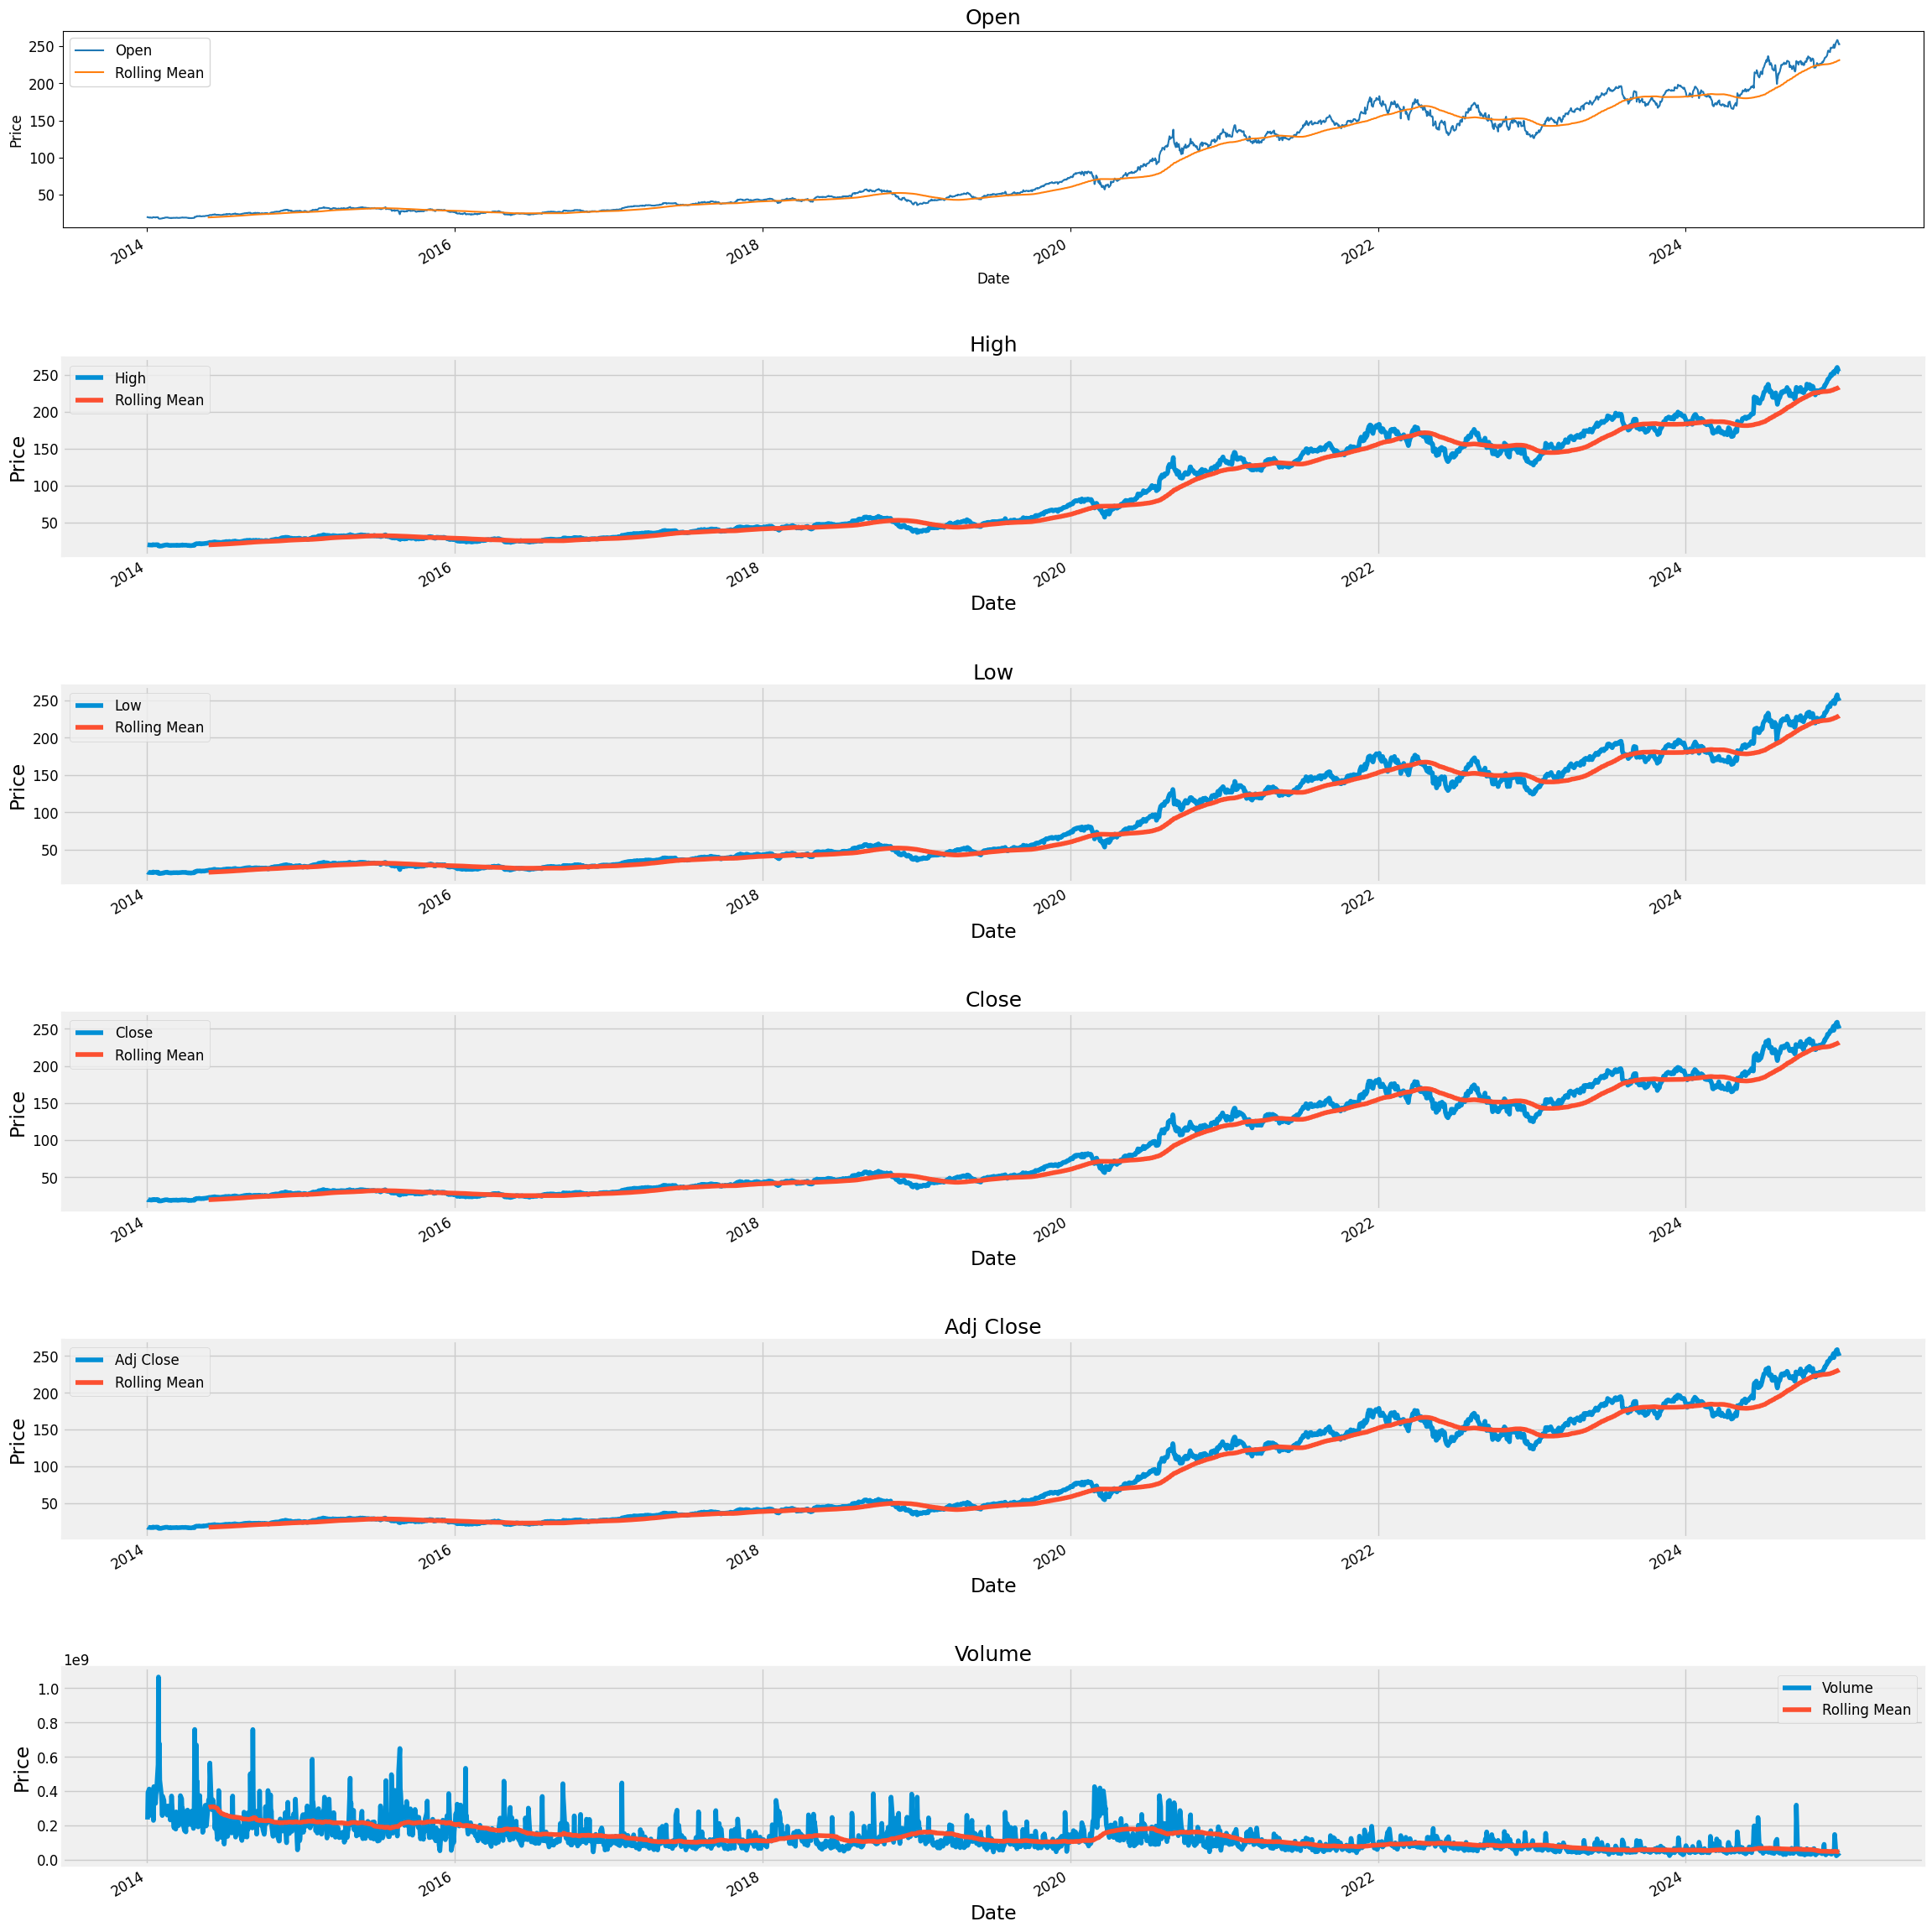

In [22]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

# **Feature Selection**
We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

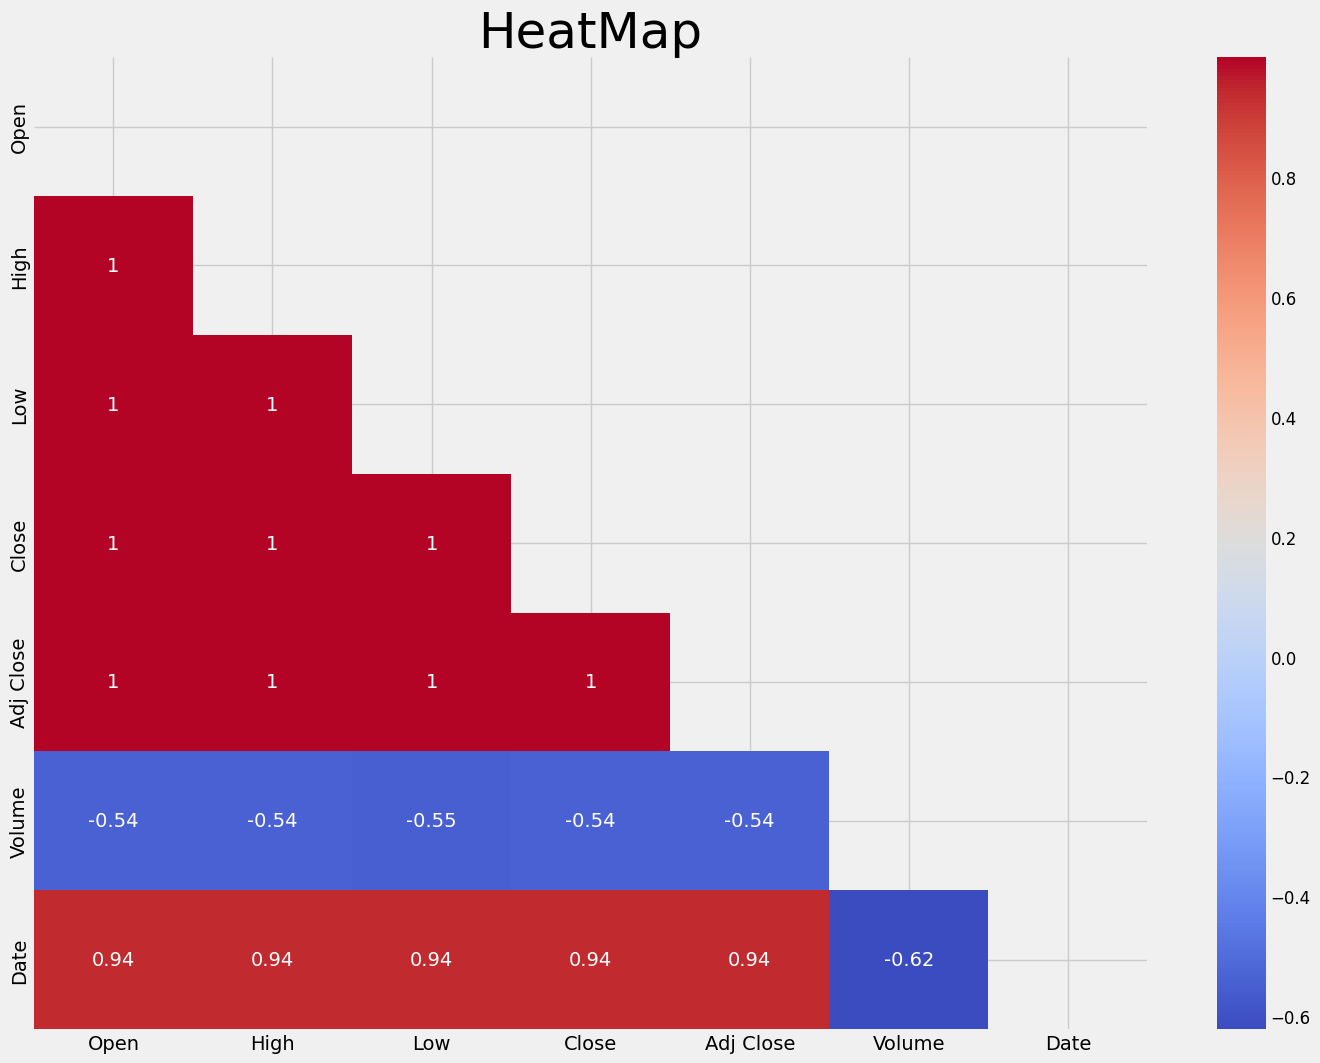

In [23]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [24]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [25]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2014-01-02,2014-01-02,17.215372
2014-01-03,2014-01-03,16.837214
2014-01-06,2014-01-06,16.929029
2014-01-07,2014-01-07,16.807970
2014-01-08,2014-01-08,16.914408
...,...,...
2024-12-24,2024-12-24,257.916443
2024-12-26,2024-12-26,258.735504
2024-12-27,2024-12-27,255.309296


# Resampling

In [26]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [27]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2014-01-31,16.727218
2014-02-28,16.472209
2014-03-31,16.694859
2014-04-30,16.940956
2014-05-31,18.966705
...,...
2024-08-31,221.073108
2024-09-30,223.266614
2024-10-31,229.550872


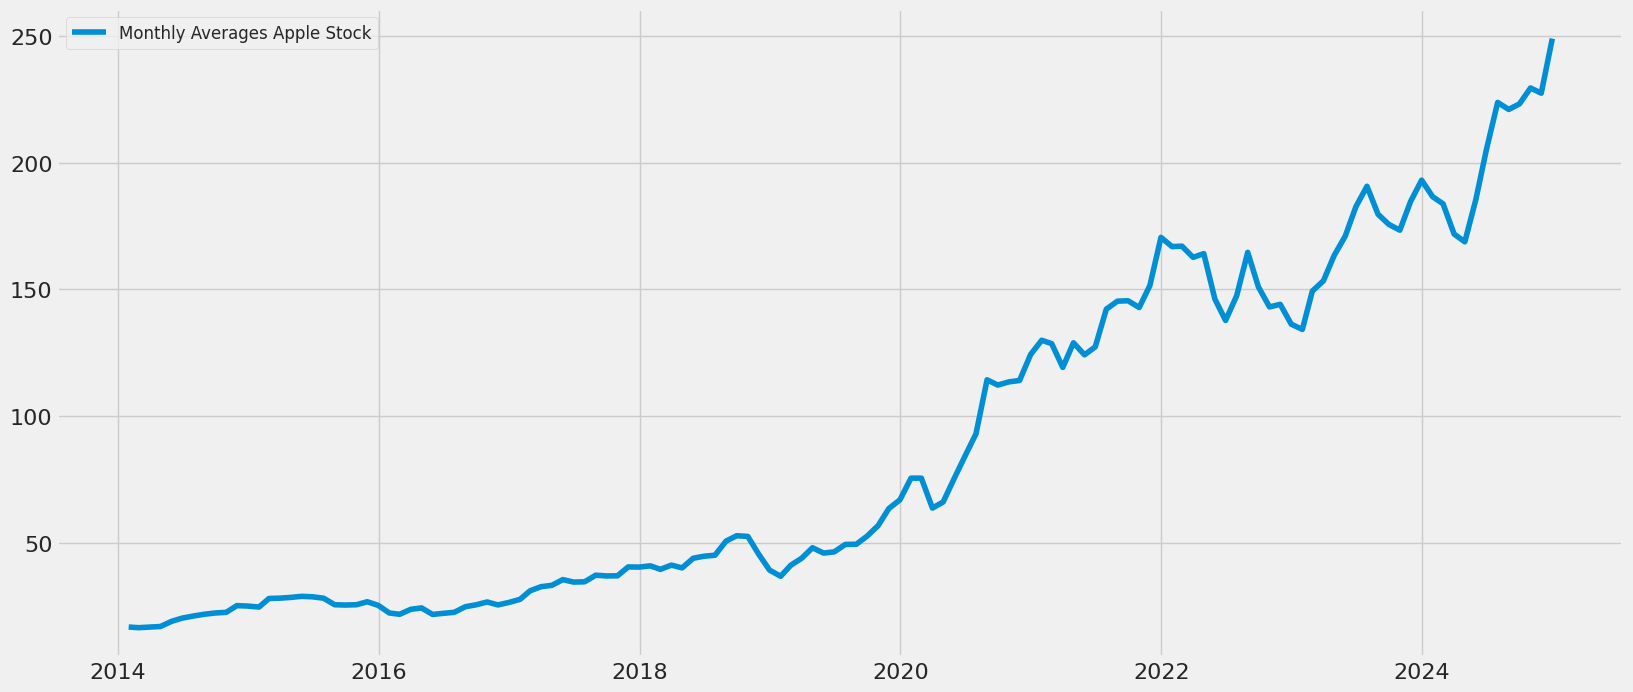

In [28]:
##Monthly Stock Price
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

# Exploratory Data Analysis

In [29]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2014-01-31,16.727218,2014,January,Friday,1
2014-02-28,16.472209,2014,February,Friday,1
2014-03-31,16.694859,2014,March,Monday,1
2014-04-30,16.940956,2014,April,Wednesday,2
2014-05-31,18.966705,2014,May,Saturday,2
...,...,...,...,...,...
2024-08-31,221.073108,2024,August,Saturday,3
2024-09-30,223.266614,2024,September,Monday,3
2024-10-31,229.550872,2024,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012'),
  Text(0, 0.014, '0.014'),
  Text(0, 0.016, '0.016')])

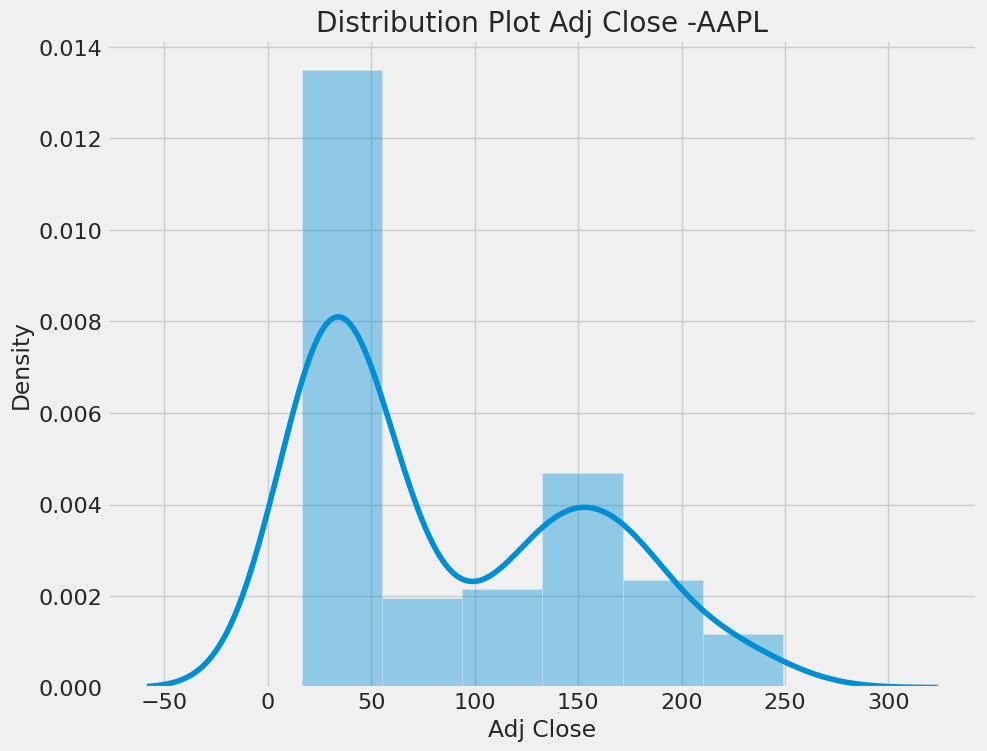

In [30]:
##Checking Distribution of Our Data
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


**Distribution Plot Inference** : Distribution shows Right Skew

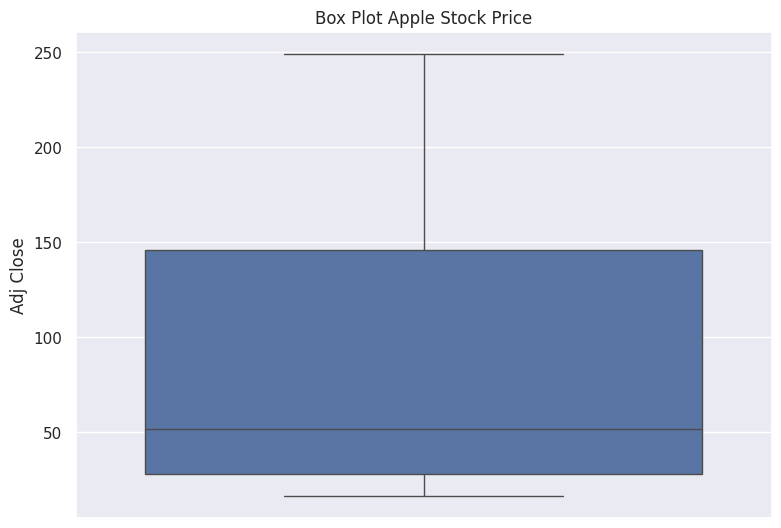

In [31]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


**Box-Plot Inference** :-

中位数（Median）：
中位数大约在50左右，表明在2014年至2024年期间，AAPL股票的调整后收盘价的中间值为50。这意味着有一半的交易价格高于50，另一半低于50。
四分位数（Quartiles）：
第一四分位数（Q1）：大约在30左右，表明25%的交易价格低于30。
第三四分位数（Q3）：大约在150左右，表明75%的交易价格低于150。
四分位距（IQR）：Q3 - Q1 = 150 - 30 = 120，表明中间50%的交易价格分布在30到150之间。
数据范围（Range）：
最小值：大约在20左右，表明在观察期间内，AAPL股票的最低调整后收盘价为20。
最大值：大约在250左右，表明在观察期间内，AAPL股票的最高调整后收盘价为250。
异常值（Outliers）：
图中没有明显的异常值，表明数据分布较为均匀，没有极端值对分析造成影响。
数据分布（Data Distribution）：
数据分布呈现正偏态（右偏），因为箱体的上须较长，表明大部分数据集中在较低的价格区间，而较高的价格区间有较长的尾部。

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

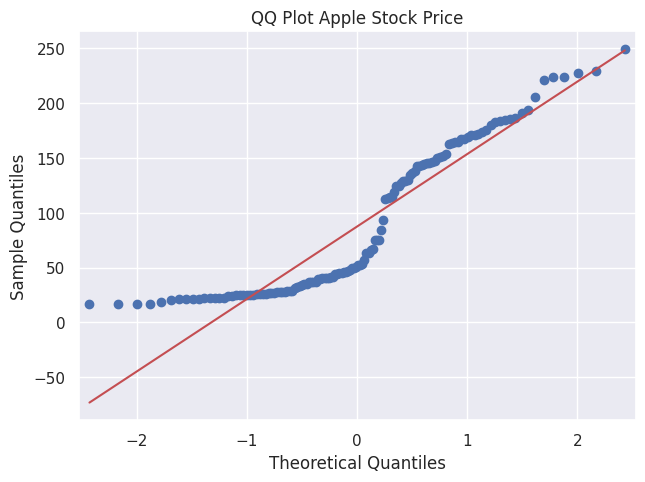

In [32]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

**QQ plot Inference :-**

整体趋势：
图中的蓝色点大致沿着红色对角线分布，这表明AAPL股票的调整后收盘价大致符合正态分布。
尾部偏离：
在图的左下角和右上角，数据点稍微偏离了对角线，这表明数据在尾部存在一些偏离正态分布的情况。具体来说：
左下角（低分位数）：数据点略低于理论分位数，表明在较低的价格区间，实际数据比正态分布预测的更小。
右上角（高分位数）：数据点略高于理论分位数，表明在较高的价格区间，实际数据比正态分布预测的更大。
中间部分：
在中间分位数范围内，数据点紧密围绕对角线分布，表明在中间价格区间，数据与正态分布的拟合较好。


In [33]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.627304803750352
Kurtosis of Distribution is  -1.0312150524035717


偏度和峰度分析
苹果股票价格的偏度和峰度值为进一步了解其分布特征提供了信息：
偏度（0.627）：这表明数据存在轻微的正偏态。正偏态意味着分布的右尾（高端）更长或更肥厚，即在较高的股票价格区间出现了更多的极端值。这与之前从Q-Q图中的观察结果一致，即上尾部偏离了理论直线。
峰度（-1.031）：这表示数据分布呈现出扁平峰度（platykurtosis），即与正态分布相比，数据的峰部更平缓，尾部更细。负峰度表明极端值较少，相比正态分布而言，极端值的风险较低。然而，与正偏态相结合，它表明任何极端值更可能出现在价格区间的高端。
解读
综合这两个指标的结果表明，尽管苹果股票价格大致呈正态分布，但在高端偶尔会出现高于平均水平的价格（正偏态）。扁平的峰部（薄峰）表明大多数数据点集中在均值附近，极端偏差较少。这一信息对于风险评估和模型选择至关重要，因为它表明假设正态性的标准模型在许多情况下可能是足够的，但可能会低估高端极端值出现的概率。

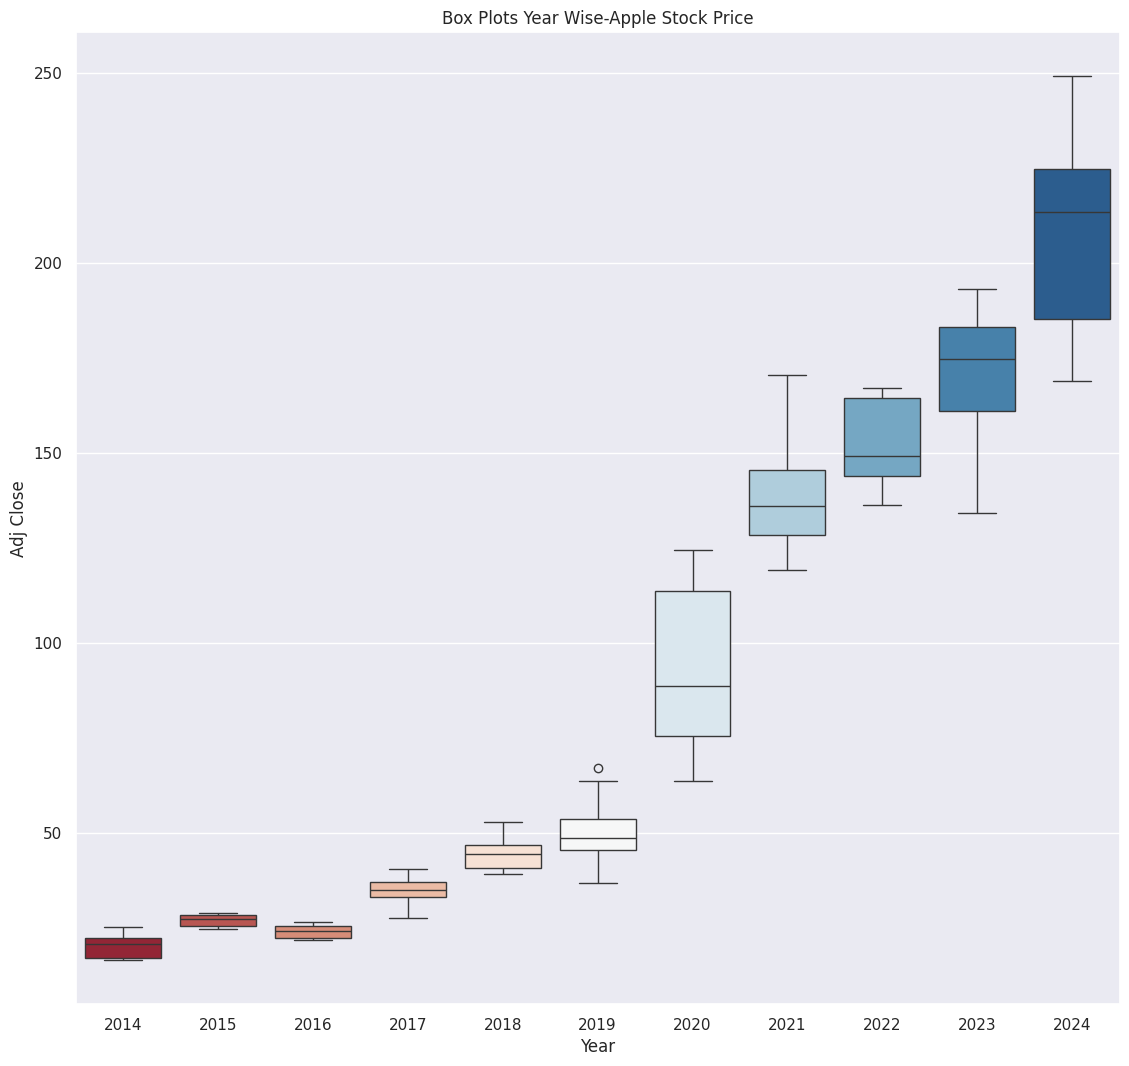

In [34]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

**Inferences Box Plot**
-> 2019年存在异常值
-> 2014年、2017-2019年波动性较大
-> 2019年是所有年份中波动最大的一年
-> 从2014年到2024年股价呈现出上升趋势
-> 每年的中位数股价在逐年稳步上升
-> 随着时间的推移，不确定性和风险逐渐增加，这可以从逐年变宽的四分位距看出
-> 2019年和2020年的数据分布显示出正偏态，表明这些年份出现了高于平均水平的价格

Text(0, 0.5, 'InterQuartile Range')

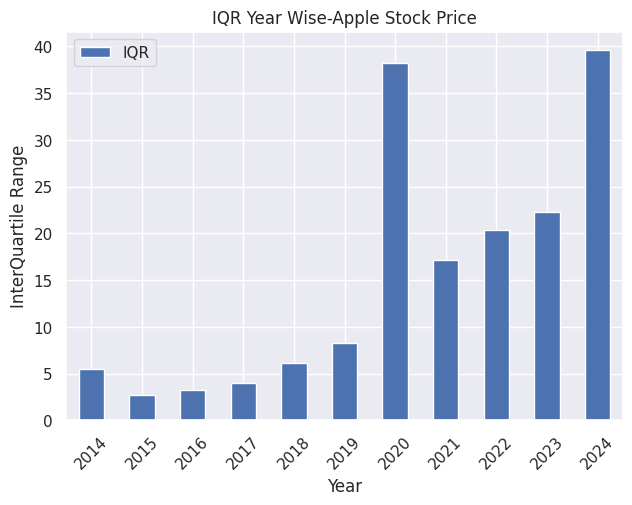

In [36]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  # Filter the DataFrame for the current year and then access 'Adj Close'
  yearly_data = monthly_data[monthly_data['Year'] == yr]['Adj Close']
  group_by_yr.append(yearly_data)
  dict_IQR[str(yr)] = stats.iqr(yearly_data)

# The rest of your code to create and plot the IQR_df DataFrame remains the same.
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')

图表内容
标题：IQR Year Wise-Apple Stock Price
纵轴：四分位距（IQR），表示每年股价的中间50%数据的分布范围。
横轴：年份（2014-2024）。
柱状图：每个柱子代表一年的IQR值。
年度IQR分析
2014年：IQR约为5，表明股价波动性较低。
2015年：IQR约为2，波动性进一步降低。
2016年：IQR约为3，波动性小幅上升。
2017年：IQR约为4，波动性继续增加。
2018年：IQR约为6，波动性显著上升。
2019年：IQR约为8，波动性进一步加大。
2020年：IQR约为38，波动性大幅增加，表明这一年股价波动剧烈。
2021年：IQR约为17，波动性有所下降，但仍高于2019年及之前的水平。
2022年：IQR约为20，波动性略有上升。
2023年：IQR约为22，波动性继续增加。
2024年：IQR约为39，波动性再次大幅上升，接近2020年的水平。
洞察与结论
波动性增加：从2014年至2024年，整体波动性呈上升趋势，尤其在2020年、2023年和2024年，IQR值显著提高。
异常年份：2020年和2024年是波动性最大的年份，可能与全球事件（如疫情）或公司重大变化有关。
市场不确定性：IQR的上升表明市场对苹果股票的不确定性增加，投资者需关注相关风险。

IQR 图分析
-> 2015年和2016年存在异常值
-> 2020年、2023年和2024年波动性较大
-> 2020年是所有年份中波动最大的一年
-> 从2014年到2024年，股价呈现出上升趋势

In [37]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2014': np.float64(5.446648380600415),
 '2015': np.float64(2.707705646093075),
 '2016': np.float64(3.244781651735874),
 '2017': np.float64(3.9551376585021956),
 '2018': np.float64(6.158245173260873),
 '2019': np.float64(8.235684288873891),
 '2020': np.float64(38.18390072397369),
 '2021': np.float64(17.11167900131295),
 '2022': np.float64(20.40729530802537),
 '2023': np.float64(22.291985241824648),
 '2024': np.float64(39.6119697394318)}

IQR数据分析
-> 当数据不符合正态分布时，四分位距（IQR）比标准差更能反映数据的离散程度，因为IQR不受异常值的影响。
-> 从IQR数据来看，2014年和2019年是苹果股票波动性最大的年份。
-> 2020年和2024年的IQR显著高于其他年份，表明这两年的股价波动幅度较大。
-> 从2014年到2024年，IQR总体呈上升趋势，表明股价的波动性逐年增加。
-> 2015年和2016年的IQR相对较低，表明这两年的股价较为稳定。
-> 2017年和2018年的IQR逐渐上升，表明这两年的股价波动性开始增加。
-> 2021年和2022年的IQR相对稳定，表明这两年的股价波动性变化不大。
-> 2023年的IQR再次上升，表明这一年股价波动性有所增加。

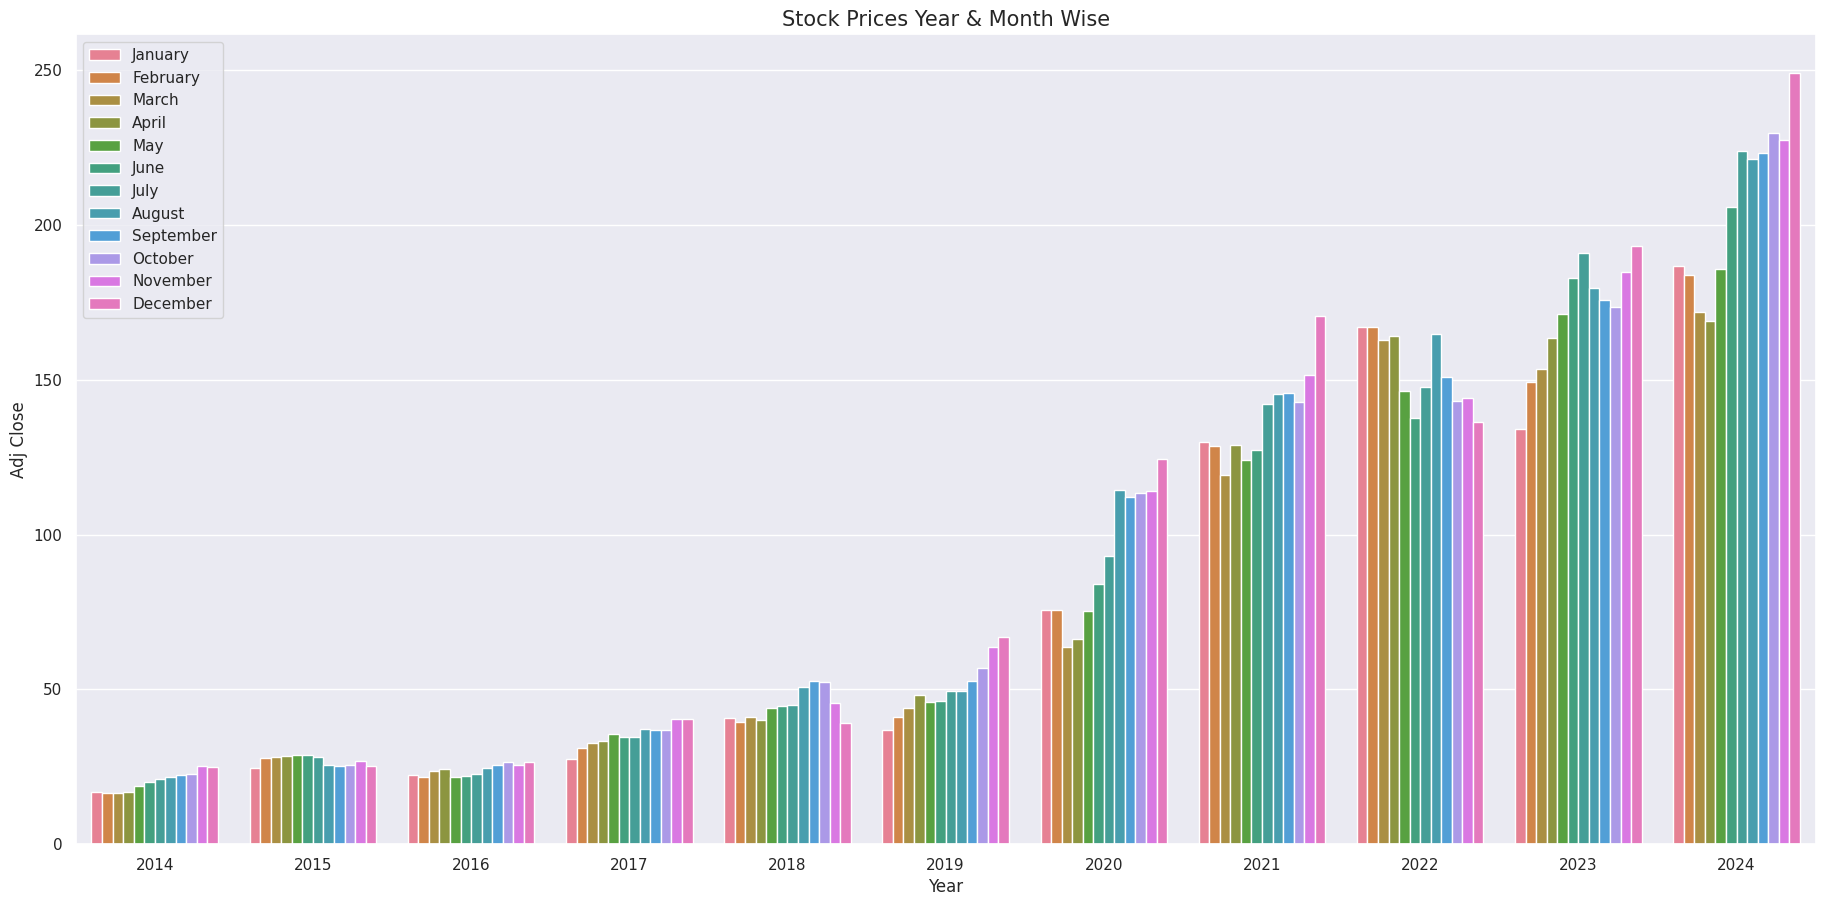

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Stock Prices Year & Month Wise 分析
-> 从图中可以看出，每年的7月至9月期间，苹果股票价格普遍高于其他月份。这主要归因于苹果在此期间发布新产品的周期，使得华尔街对即将推出的产品充满期待。
-> 2020年之后，股票价格整体显著上升，这可能与公司业绩增长、市场环境变化以及新产品发布策略的调整有关。
-> 每年11月和12月的价格也相对较高，这可能与假日购物季和年终财务结算有关。
-> 2014年至2019年期间，股票价格相对较低且波动较小，显示出较为稳定的市场环境。
-> 2020年是一个转折点，从这一年开始，股票价格开始大幅上涨，这可能与全球市场对苹果产品的持续需求以及公司战略的成功执行有关。


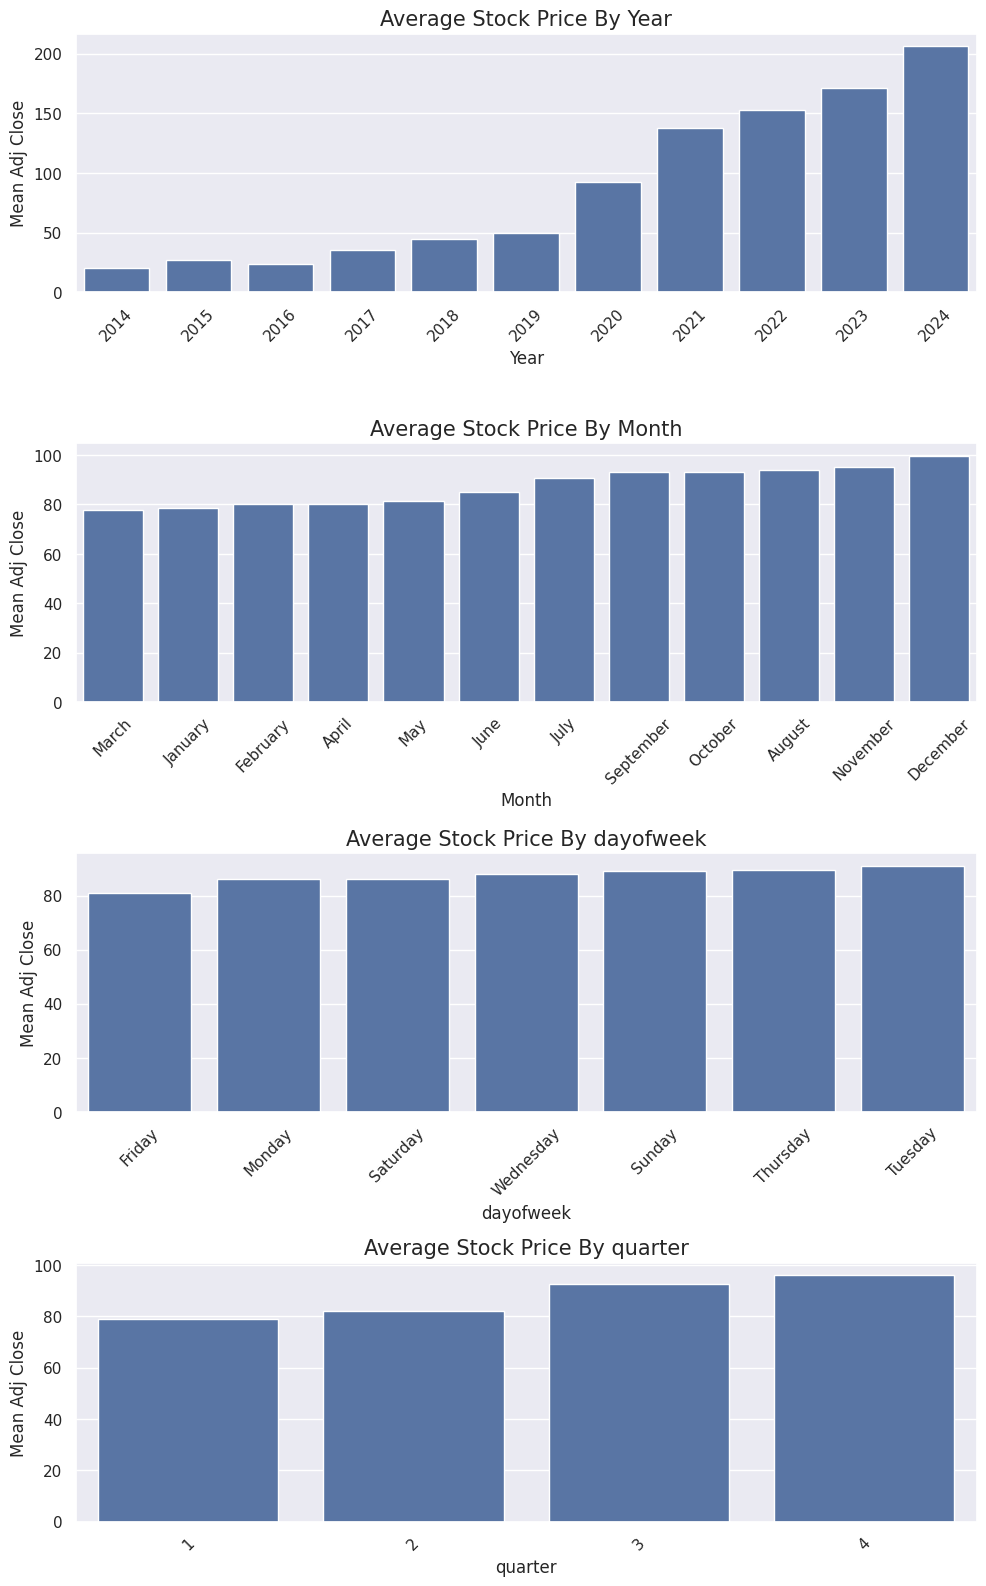

In [40]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)

plt.tight_layout(pad=1)

Average Stock Price Analysis
-> 根据年度平均股价，2014年和2016年是仅有的两个年份，其平均股价低于前一年。
-> 周初的平均股价相对较低，而周末的平均股价相对较高。
-> 11月的平均股价最高。
-> 第4季度（Q4）对苹果而言表现最佳，根据平均股价显示，由于新产品发布周期和假日购物季的双重影响，此季度销售强劲，同时也体现出苹果股票的季节性效应。


# Decomposition of Time Series


<Figure size 2000x1600 with 0 Axes>

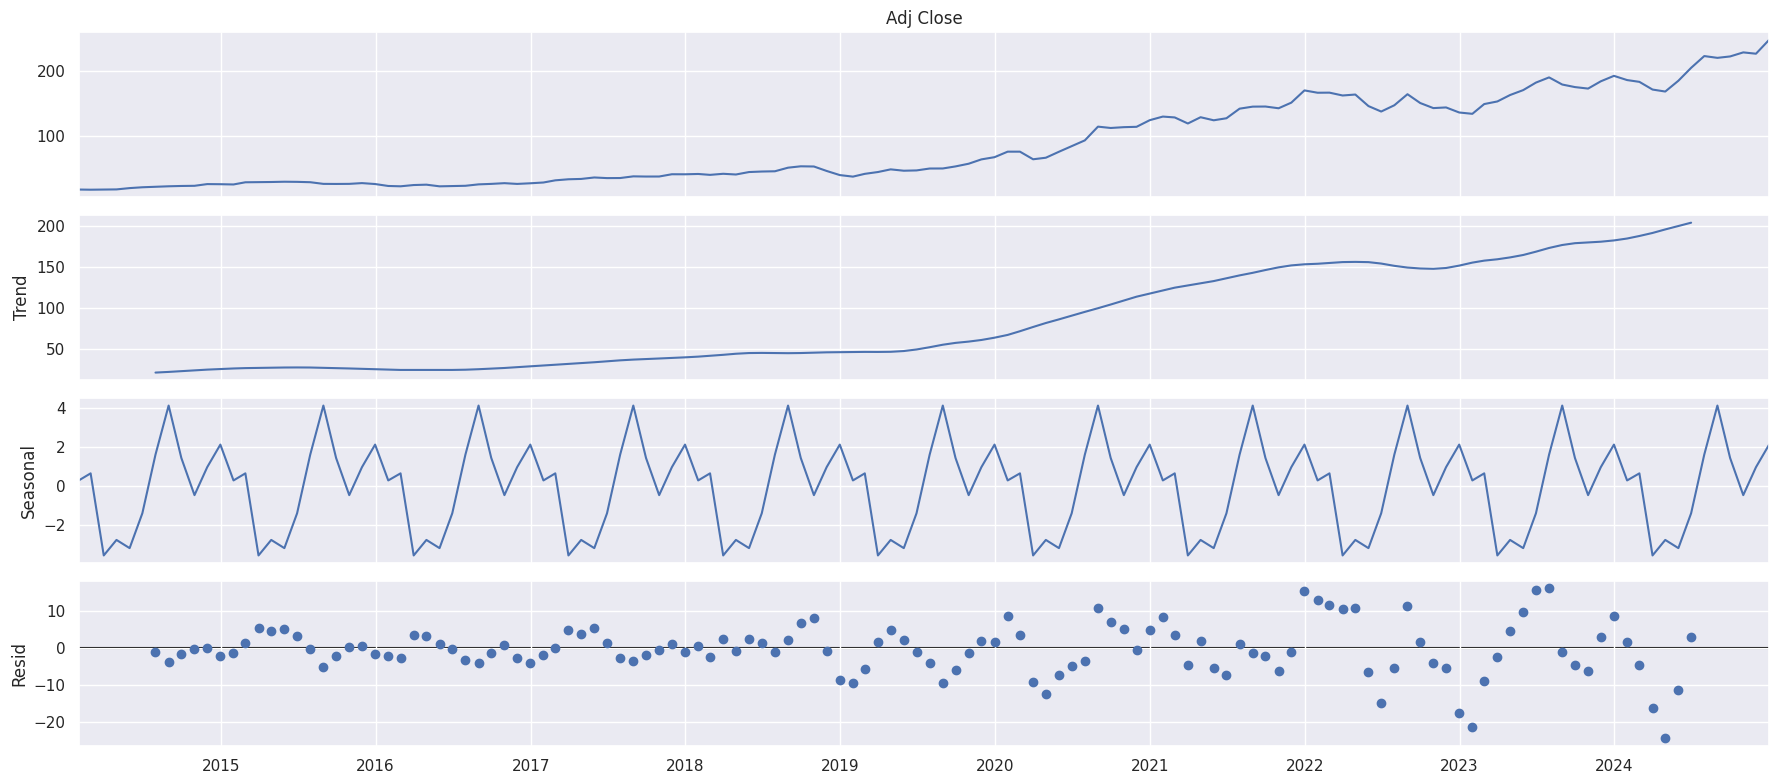

In [42]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',period=12) # Changed freq to period
decomposed_series.plot()
plt.show()

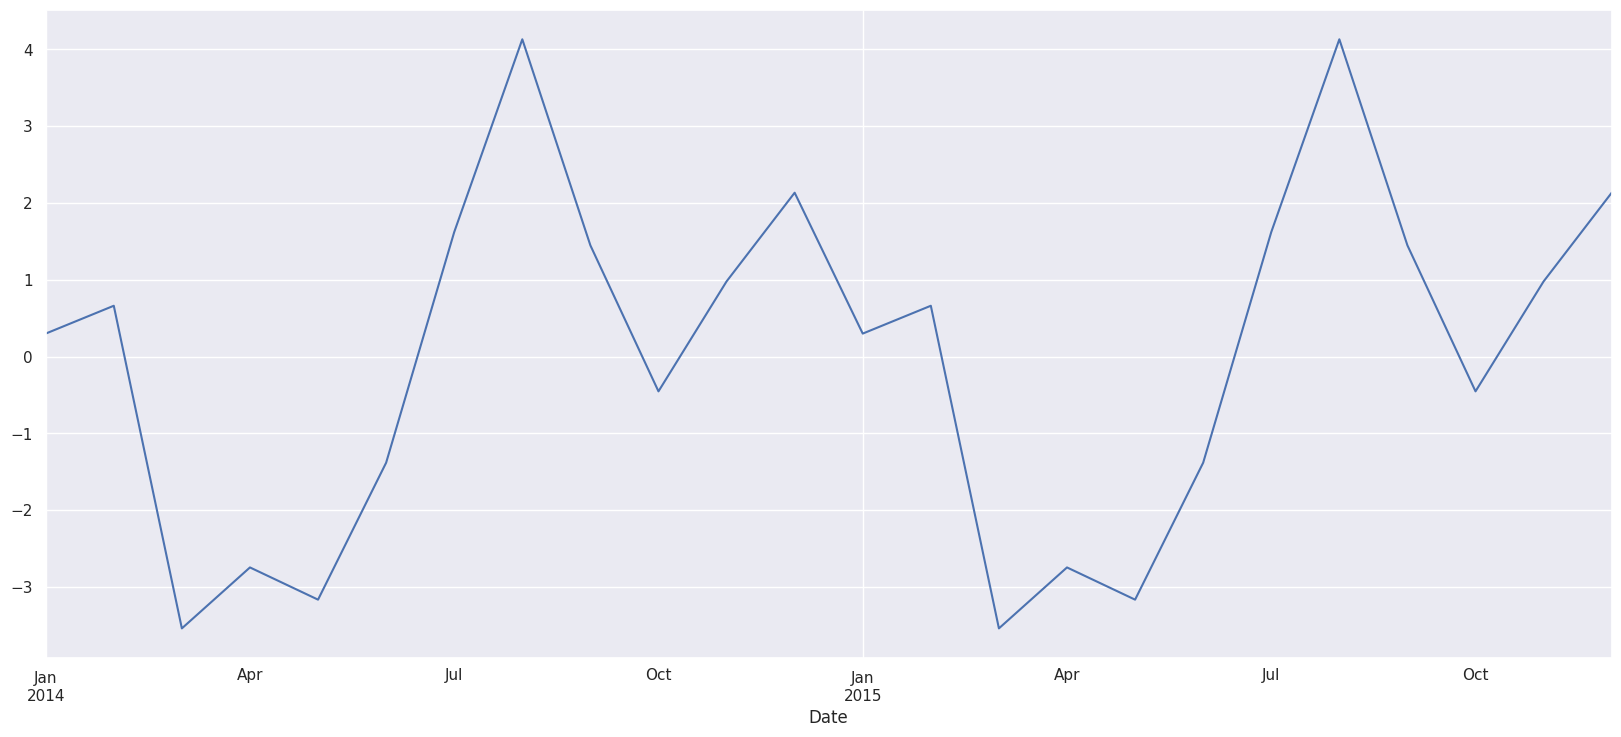

<Figure size 800x800 with 0 Axes>

In [46]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2014':'2015'].plot()
fig = plt.figure(figsize=(8,8))

Inferences By Decomposition :-
-> 趋势（Trend）：整体呈现上升趋势，表明苹果公司的股价在过去几年中总体上是增长的。
-> 季节性（Seasonality）：存在明显的季节性波动，苹果公司的股价在每年的假日期间通常会出现上涨。这与新产品发布和假日购物季所带来的销售增长密切相关。
-> 残差（Resid）：残差部分显示了数据中去除趋势和季节性成分后的随机波动，大部分残差值在零附近波动，表明模型对数据的拟合效果较好。
-> 季节性一致性：每年的季节性分解图显示出相似的模式，表明苹果公司的股价在每年的相同时间段表现出一致的季节性波动模式。这可能反映了公司稳定的产品发布周期和市场活动对股价的影响。


# Stationarity of Time Series

**Stationarity Test of Time Series**

Using Augmented Dickey-Fuller(ADF) Test

**Null Hypothesis** : Time series has a unit root -*It is non-stationary*

**Alternate Hypothesis** :   Time series does not have a unit root -*It is stationary*


Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [48]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))

  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')



In [49]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.772605
p-value: 0.998293
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
Failed to Reject Ho-Time Series is Non-Stationary


结论：由于ADF统计量大于所有临界值，且p值接近1，我们无法拒绝原假设。这表明时间序列是非平稳的。

AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

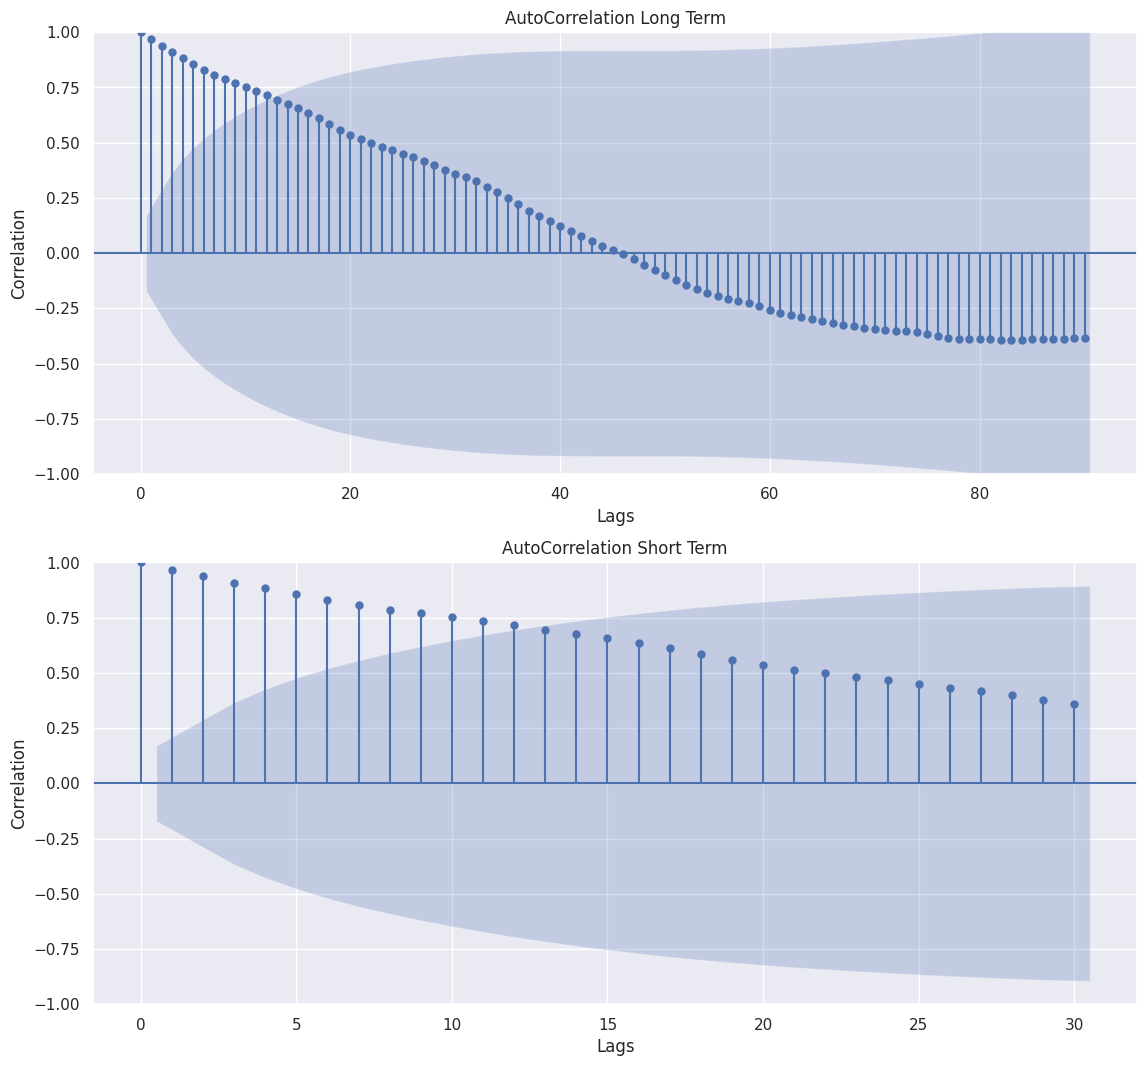

In [50]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

-> 自相关系数的缓慢衰减表明，未来的值与滞后值存在较强的依赖关系，这表明该序列不是随机的，适合进行时间序列建模。
-> 自相关系数在滞后阶数增加时逐渐减弱，这也表明序列是非平稳的。
-> 在短期自相关图中，前几个滞后阶数上有较高的自相关性，这可能表明存在移动平均过程（MA(1)）。

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 90 must be < 66.

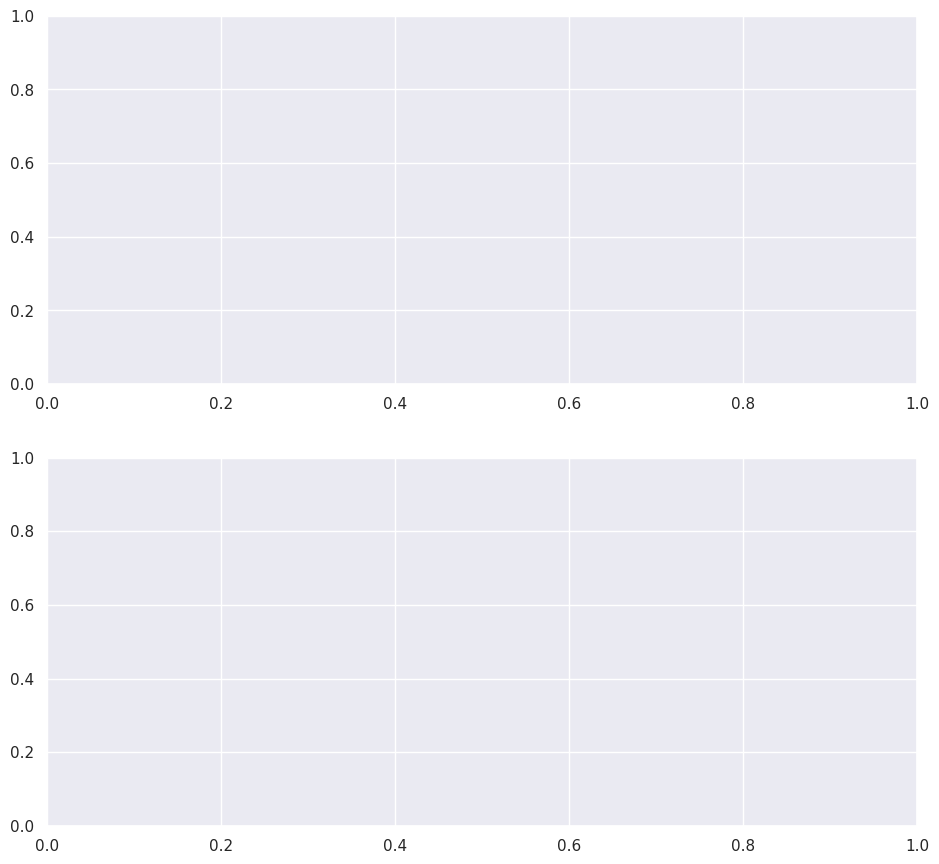

In [51]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

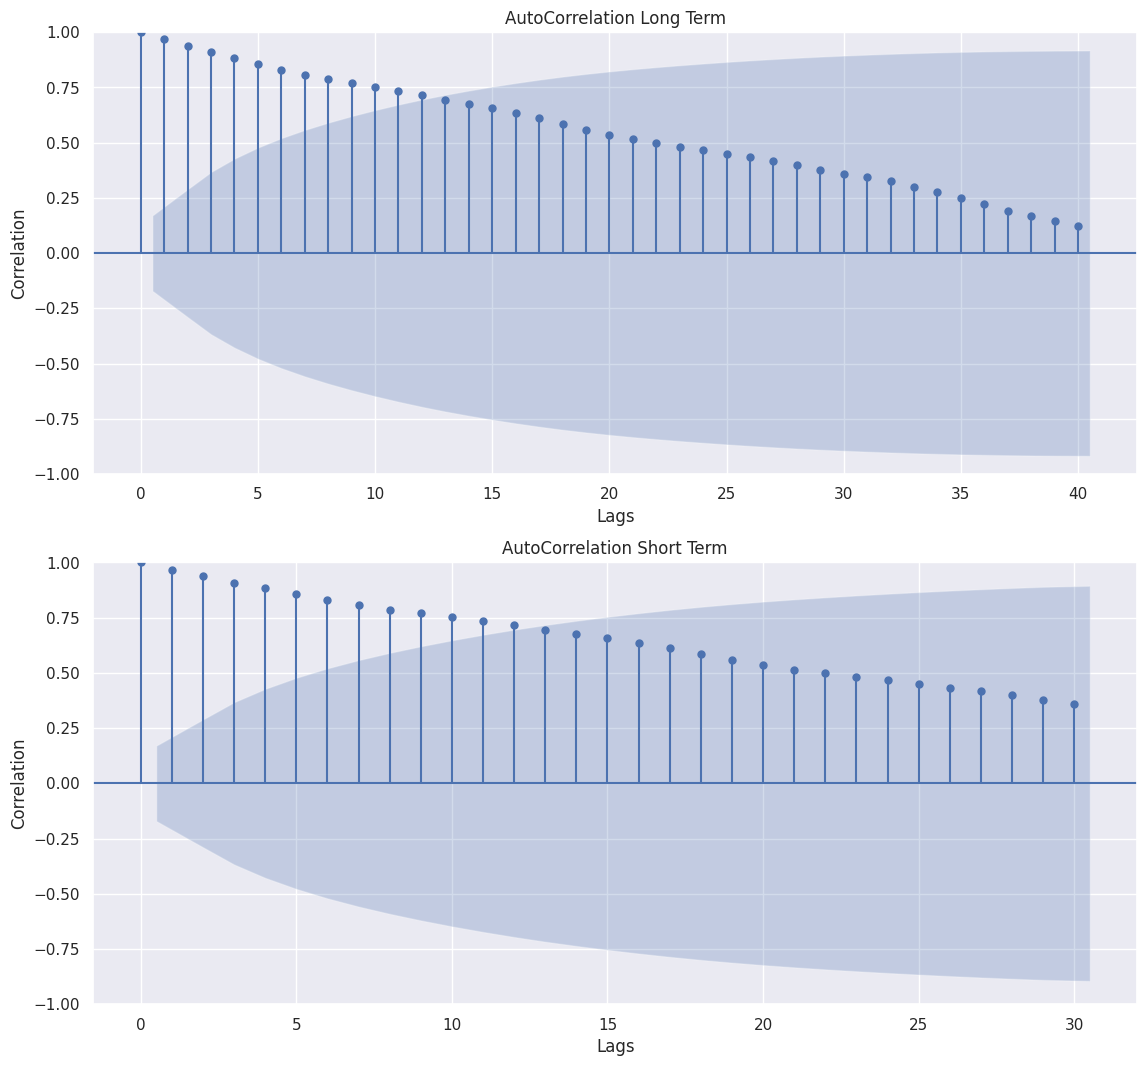

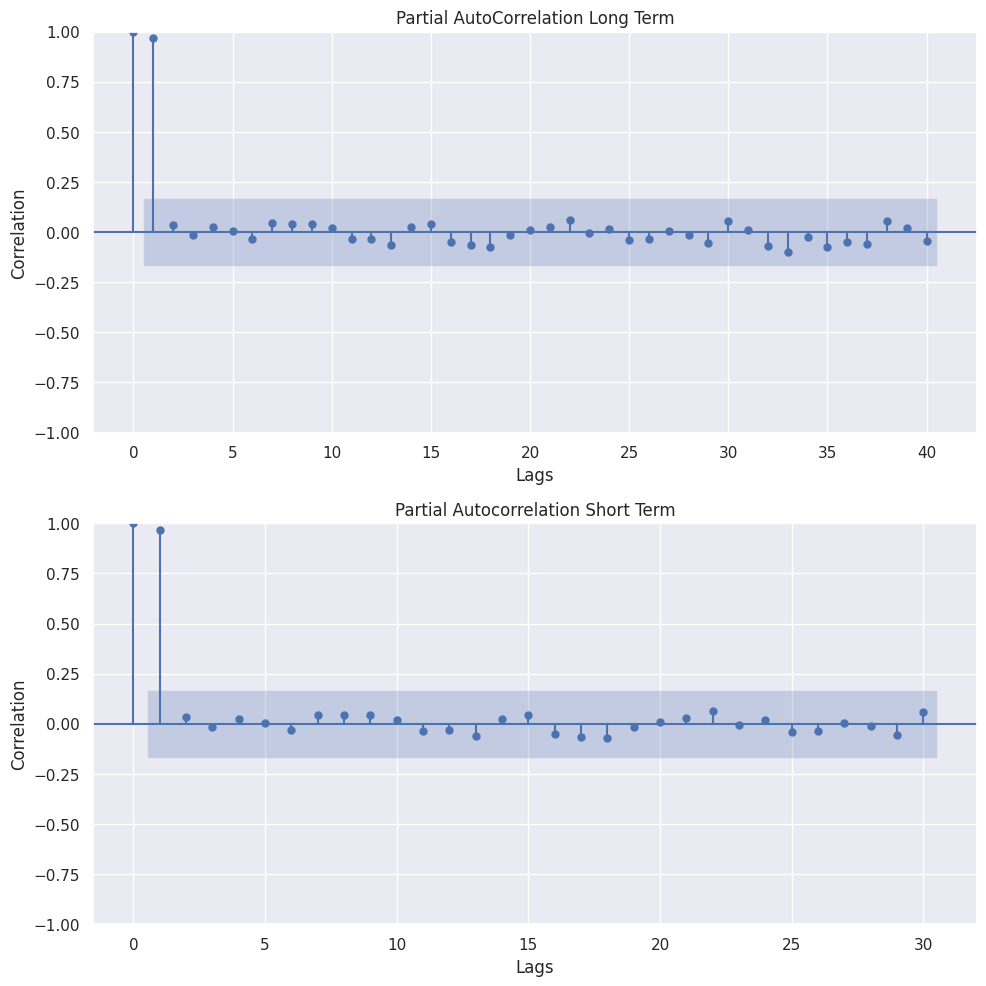

In [52]:
# ipython-input-50-508bf3ad1573
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
# Reduce the number of lags for the long-term ACF plot to be less than 50% of sample size (132/2 = 66)
acf = plot_acf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

# ipython-input-51-508bf3ad1573
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
# Reduce the number of lags for the long-term PACF plot to be less than 50% of sample size (132/2 = 66)
pacf = plot_pacf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial Autocorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
ax1.set_ylabel('Correlation') # Corrected: Added y-label for ax1
ax1.set_xlabel('Lags') # Corrected: Added x-label for ax1
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

-> 在长期和短期的偏自相关图中，滞后0处的偏自相关系数为1（恒成立）。
-> 在滞后1处，偏自相关系数显著，之后迅速衰减至零并在置信区间内波动，表明序列可能存在一阶自回归（AR(1)）特性。
-> 这种快速衰减表明序列的自相关性主要体现在滞后1期，支持AR(1)模型的假设。



**Transformations To Make Series Stationary**

In [53]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

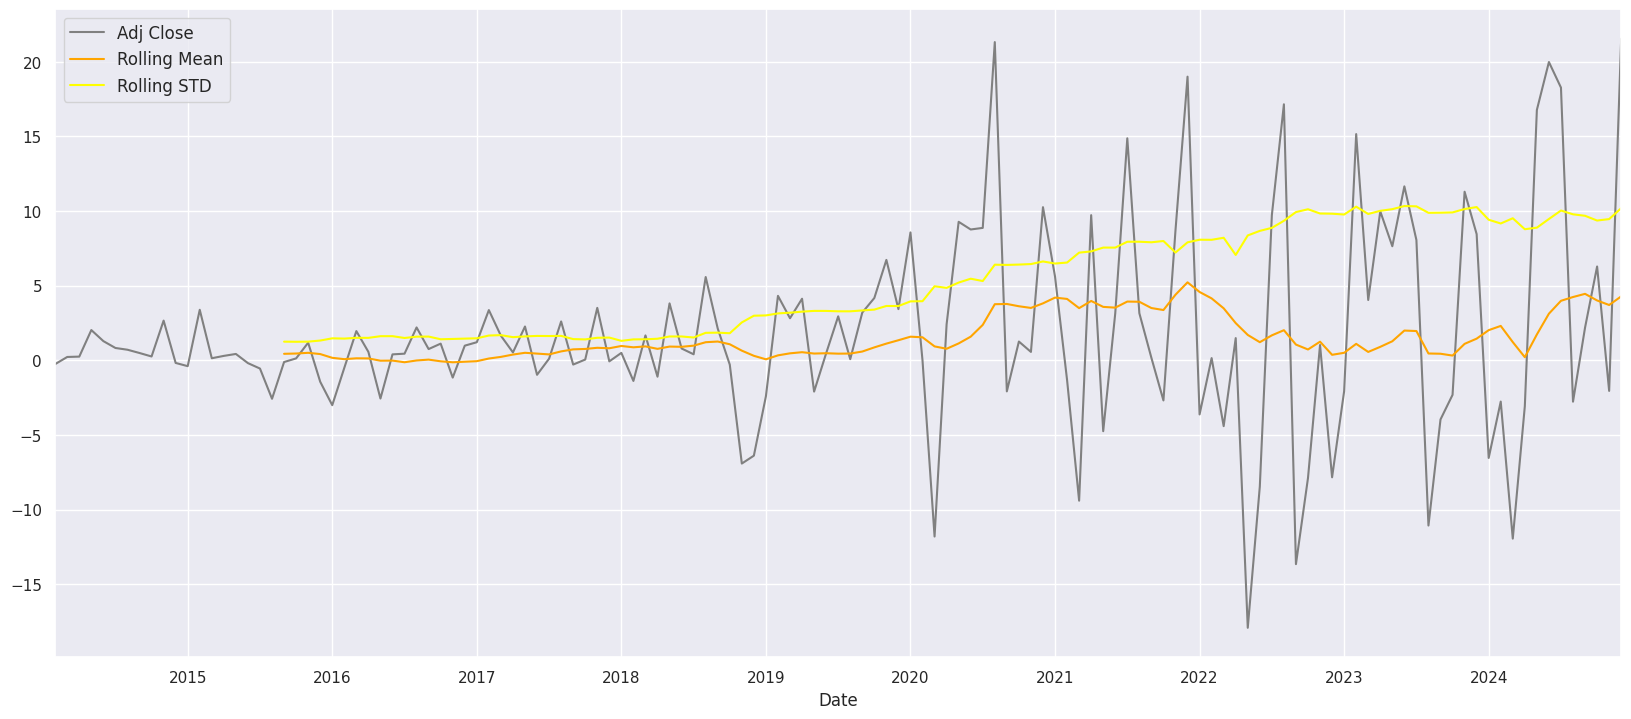

In [54]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .

In [55]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -3.433646
p-value: 0.009864
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
Reject Null Hypothesis(Ho)-Time Series is Stationary


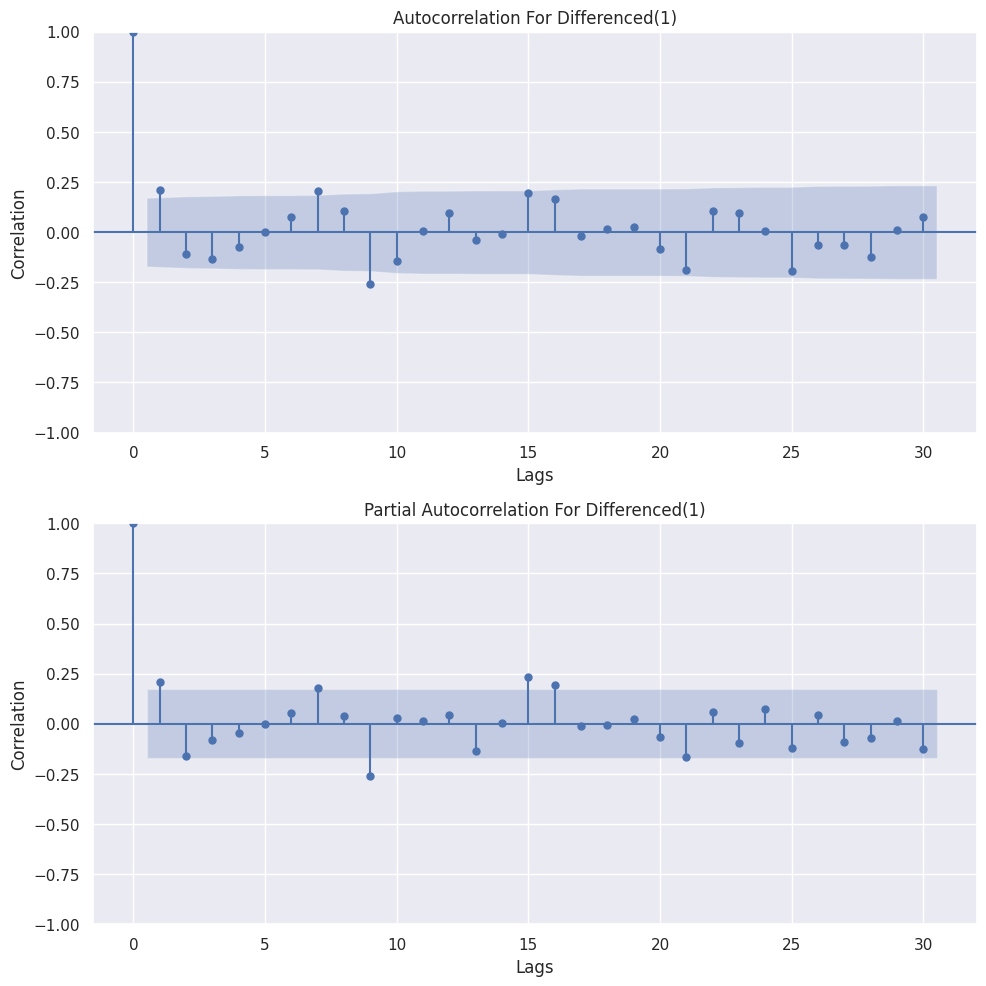

In [56]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# **Modelling Seasonal ARIMA**

In [57]:
modelling_series = monthly_data['Adj Close']
modelling_series

,Adj Close
Date,
2014-01-31,16.727218
2014-02-28,16.472209
2014-03-31,16.694859
2014-04-30,16.940956
2014-05-31,18.966705
...,...
2024-08-31,221.073108
2024-09-30,223.266614
2024-10-31,229.550872


**Train-Test Split**

In [58]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [59]:
train.head(2)

,Adj Close
Date,
2014-01-31,16.727218
2014-02-28,16.472209


In [60]:
test.head(2)

,Adj Close
Date,
2020-08-31,114.341866
2020-09-30,112.258474


In [ ]:
print('Train',len(train))
print('Test',len(test))

Train 57
Test 39


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .

Parameters for Series already indicate Non-Seasonality Part with Order (1,1,1).

AR(1) derived by the PACF plot

MA(1) derived by the ACF Plot

Differencing(1) derived by differencing and observing stationarity.


# Hyper Parameter Tuning for Model Order

In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:350.75081385350666

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:332.11071968501557

ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:300.4957600928522

ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:286.2126039361744

ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:331.740255110838

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:333.46473592208514

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:324.7832626860535

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:262.4409992969335

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:256.71390487682834

ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:206.26186908985358

ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:206.79066847021136

ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:459.6835652708871

ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:386.9565978957946

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:3937.920519627023

By Observing the Lowest AIC , we come to Seasonality Order of (2,2,0)12 and non-seasonal component is (1,1,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present.
During Fall time period (July-Nov) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

# Back-Testing Training and Testing Data

> Since we cannot use cross validation in our time series based datasets,as it can jumble the datasets during different folds.

> This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups.
We can use backtesting method for time series.

> In backtesting we can create multiple train-test splits keeping in mind the temporal order of our data during splits . For example if I have dataset between Jan to Dec

Split - 1 : Train Data (Jan to Aug) + Test Data (Aug to Dec)

Split - 2 : Train Data (Jan to Sept) + Test Data (Sept to Dec)

Split - 3 : Train Daata (Jan to Oct) + Test Data (Oct to Dec) and so on ...
We can have multiple splits in our dataset to validate our model rather than just one split like traditional train test splits .

Reference : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/


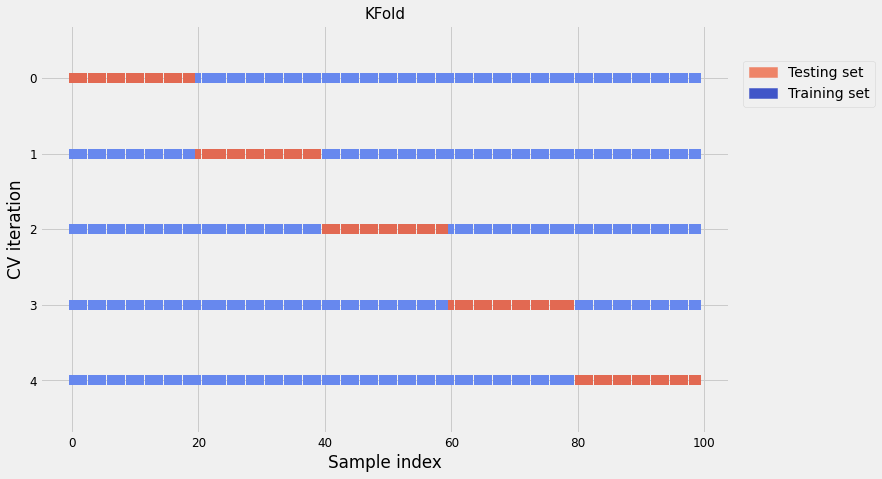

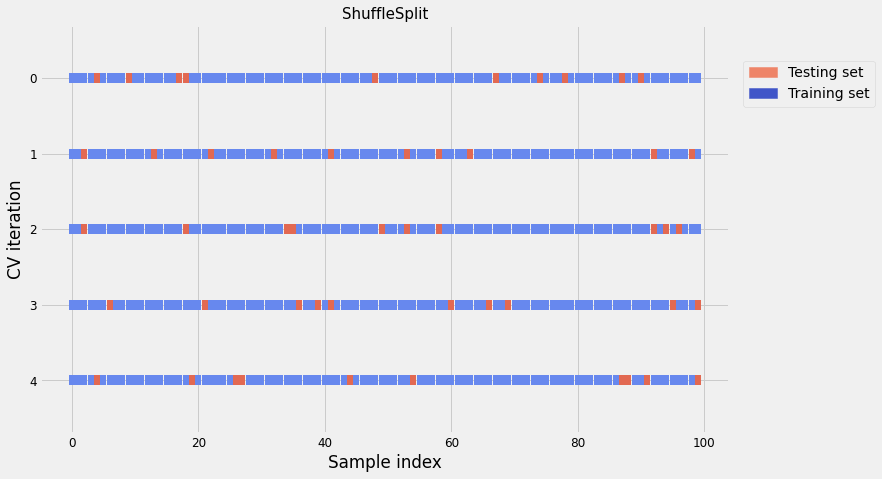

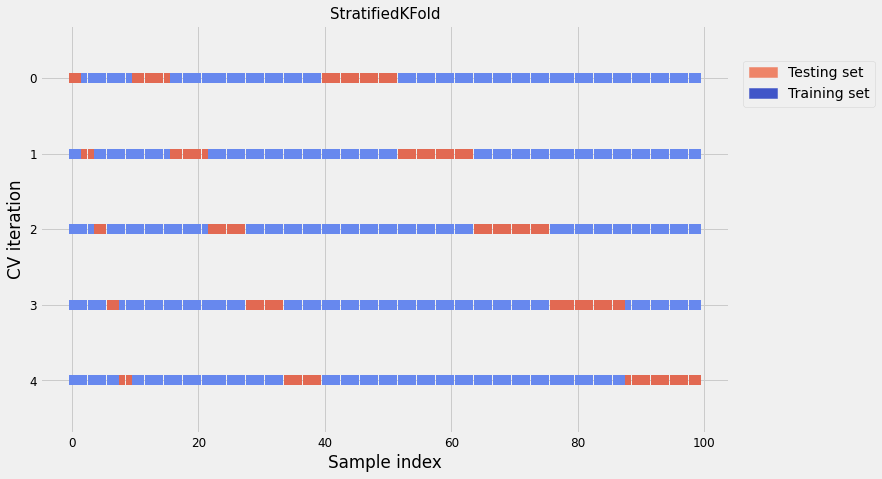

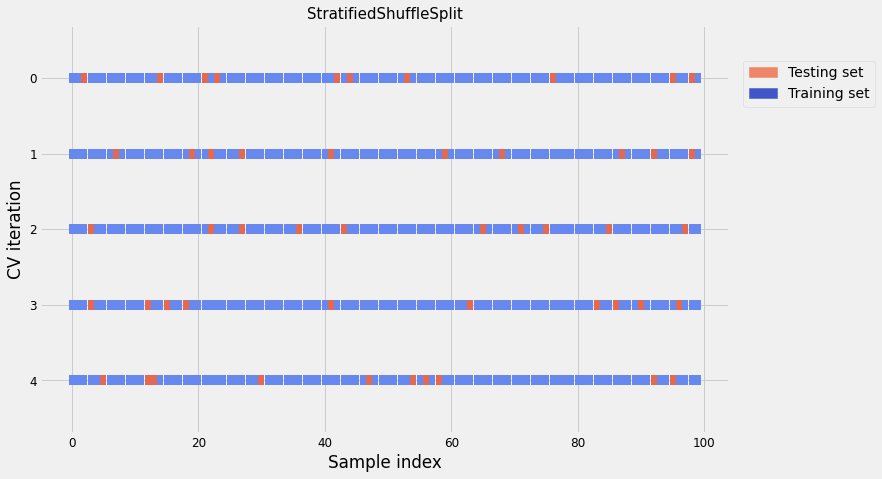

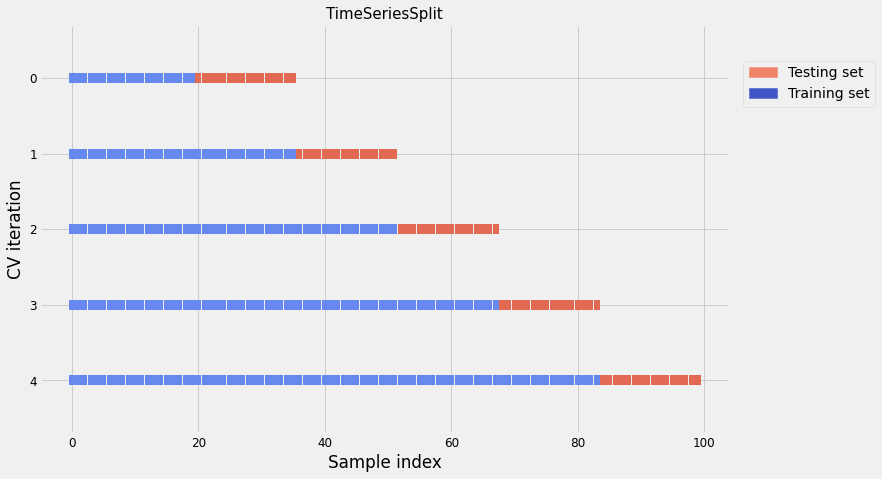

In [ ]:
## Using TimeSeriesSplit from sklearn library
## Citation : https://www.kaggle.com/tomwarrens/timeseriessplit-how-to-use-it

pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""

    fig, ax = plt.subplots(1, 1, figsize = (11, 7))

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))

    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)

    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)


for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

In [ ]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))

# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 39
Training Observations: 20
Testing Observations: 19
Observations: 58
Training Observations: 39
Testing Observations: 19
Observations: 77
Training Observations: 58
Testing Observations: 19
Observations: 96
Training Observations: 77
Testing Observations: 19


<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

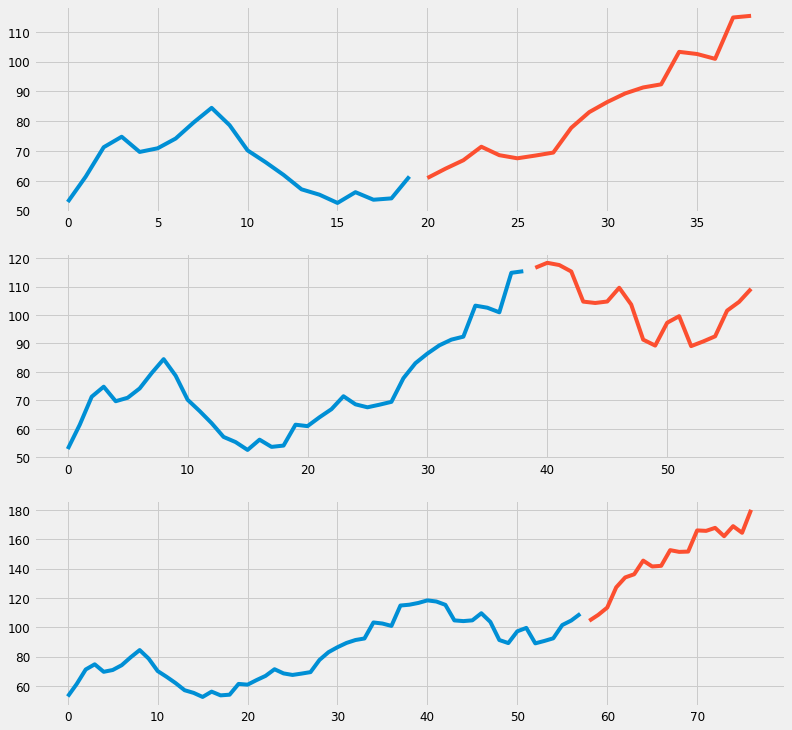

Train and Test different pairs across time series.

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')





    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

# Backtest Set 1

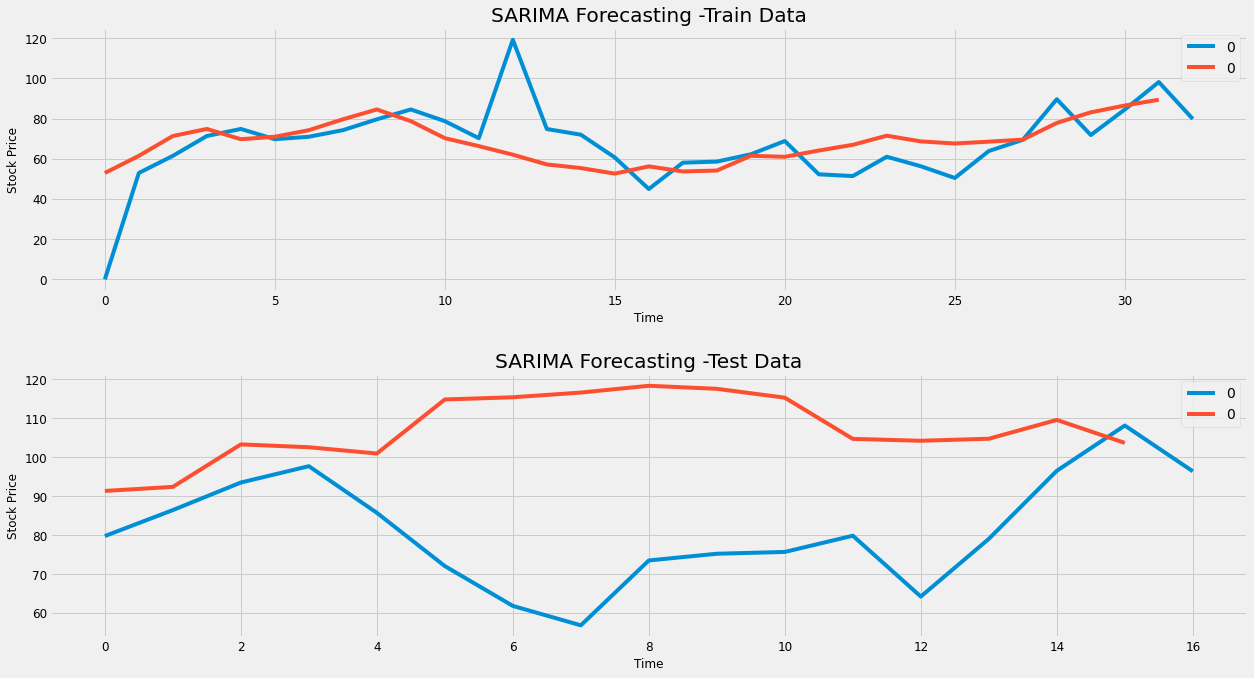

In [ ]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

# Backtest Set-2


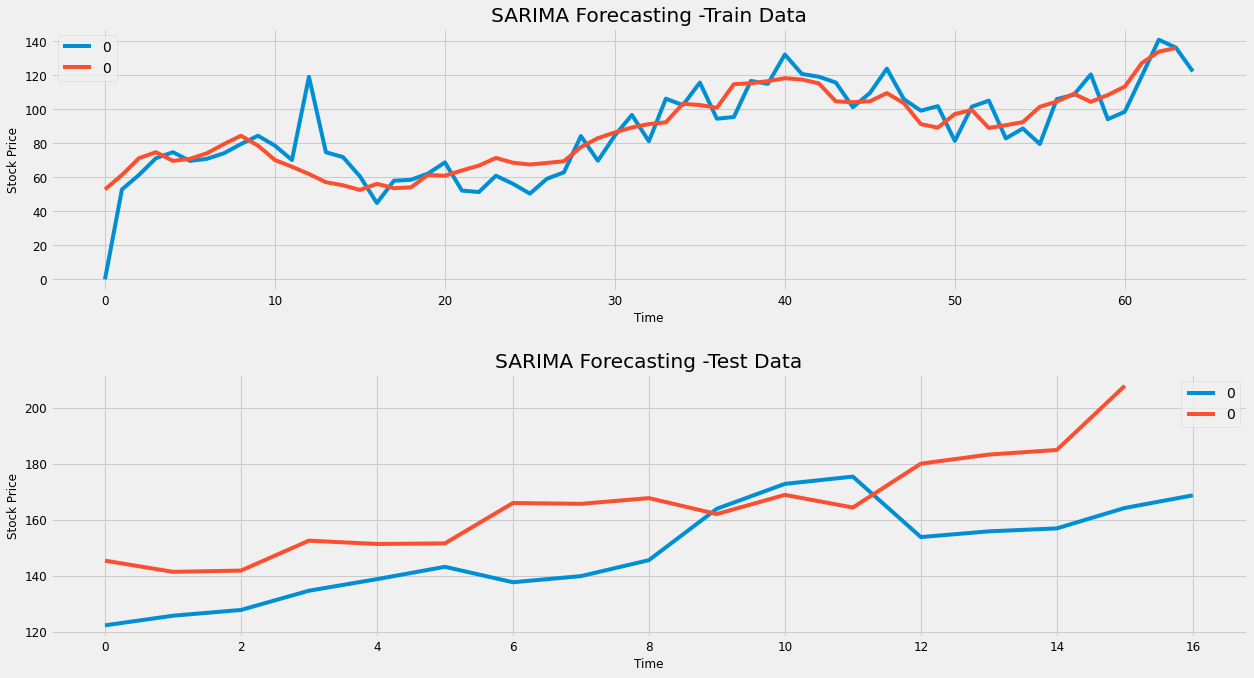

In [ ]:
## Backtest Set-3
backtest_model(train_list[4],test_list[4])

# Backtest Set-3

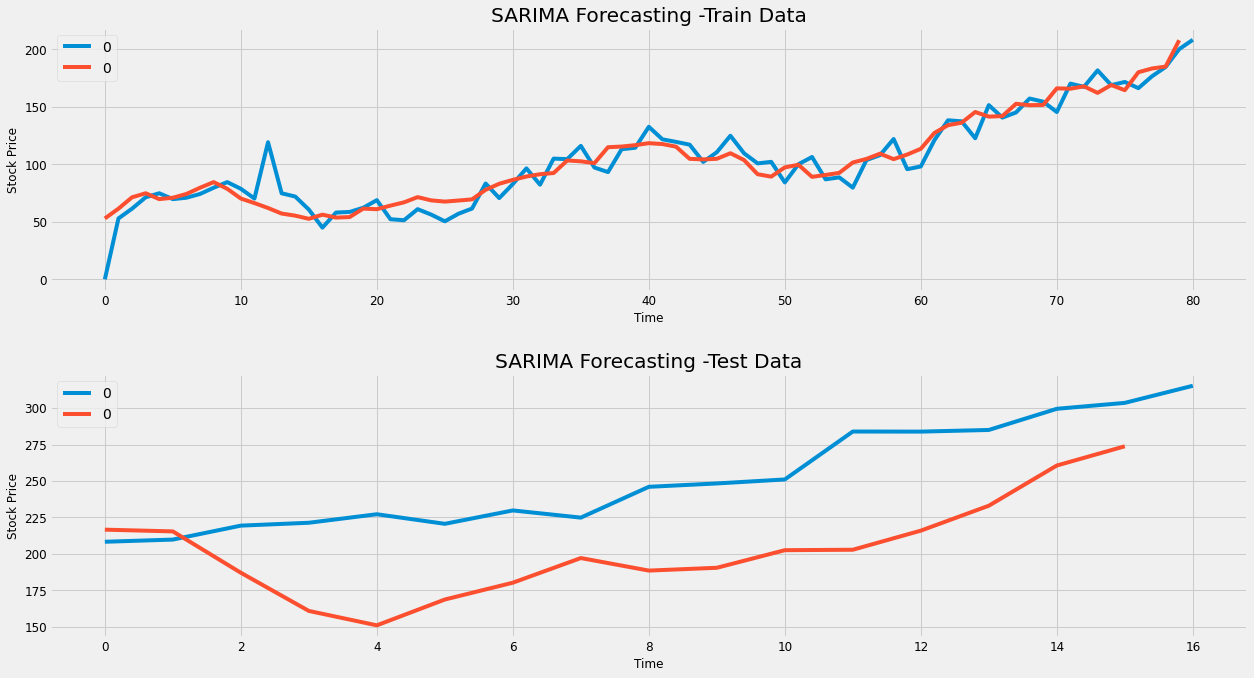

In [ ]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

By using backtesting we can validate our model on multiple train-test splits.
Red is the training set and blue indicates test set.

# Forecasting Seasonal ARIMA

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

In [ ]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

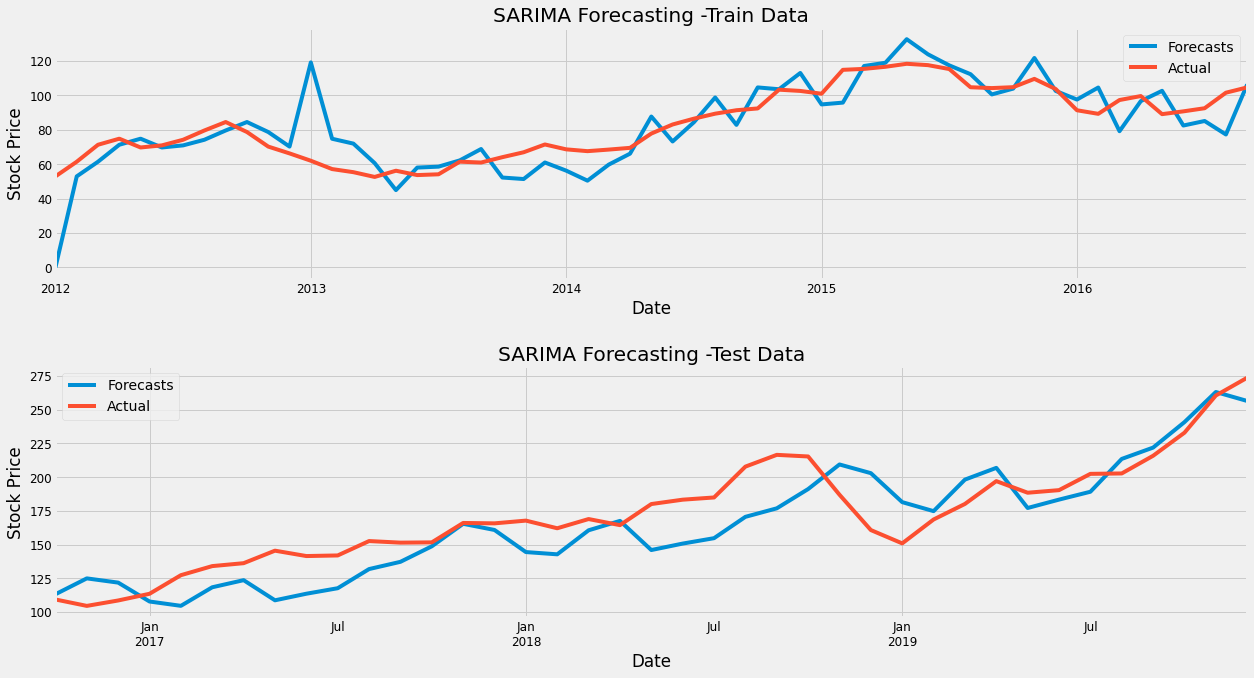

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
Mean Absolute Percentage Error 13.39
Accuracy(100-MAPE) of Model is 87.0%
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.121
Mean Absolute Error :  17.557
Mean Absolute Percentage Error 10.65
Accuracy(100-MAPE) of Model is 89.0%
None


Training and Test Accuracy is equivalent .
Model Fit is good , no overfit or underfit.

In [ ]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(2, 2, 0, 12)   Log Likelihood                -120.570
Date:                            Fri, 21 Aug 2020   AIC                            251.139
Time:                                    18:17:51   BIC                            258.468
Sample:                                01-31-2012   HQIC                           253.569
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7677      0.439      1.748      0.081      -0.093       1.629
ma.L1         -0.5014      0.592   

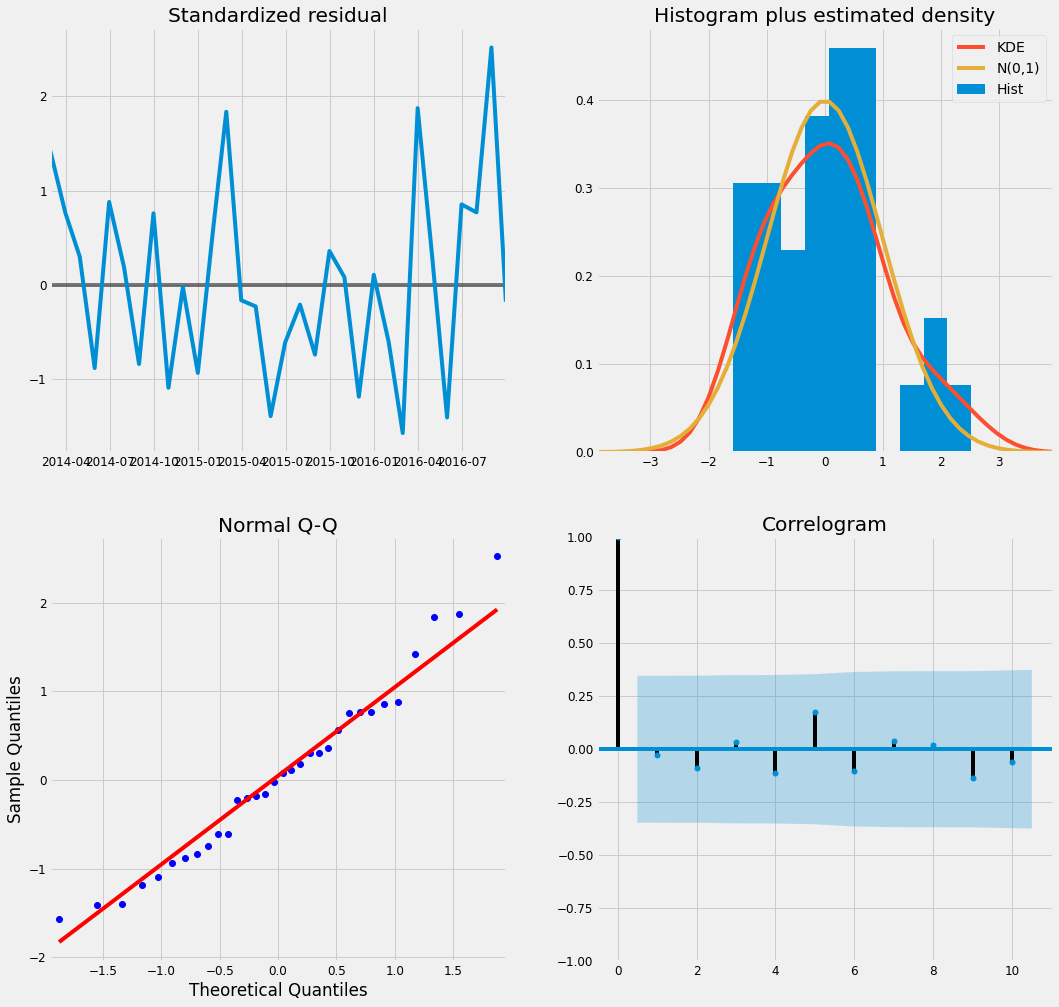

In [ ]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.

# Residual Analysis Test Data




In [ ]:
residuals_test = test-forecasts_test

No handles with labels found to put in legend.


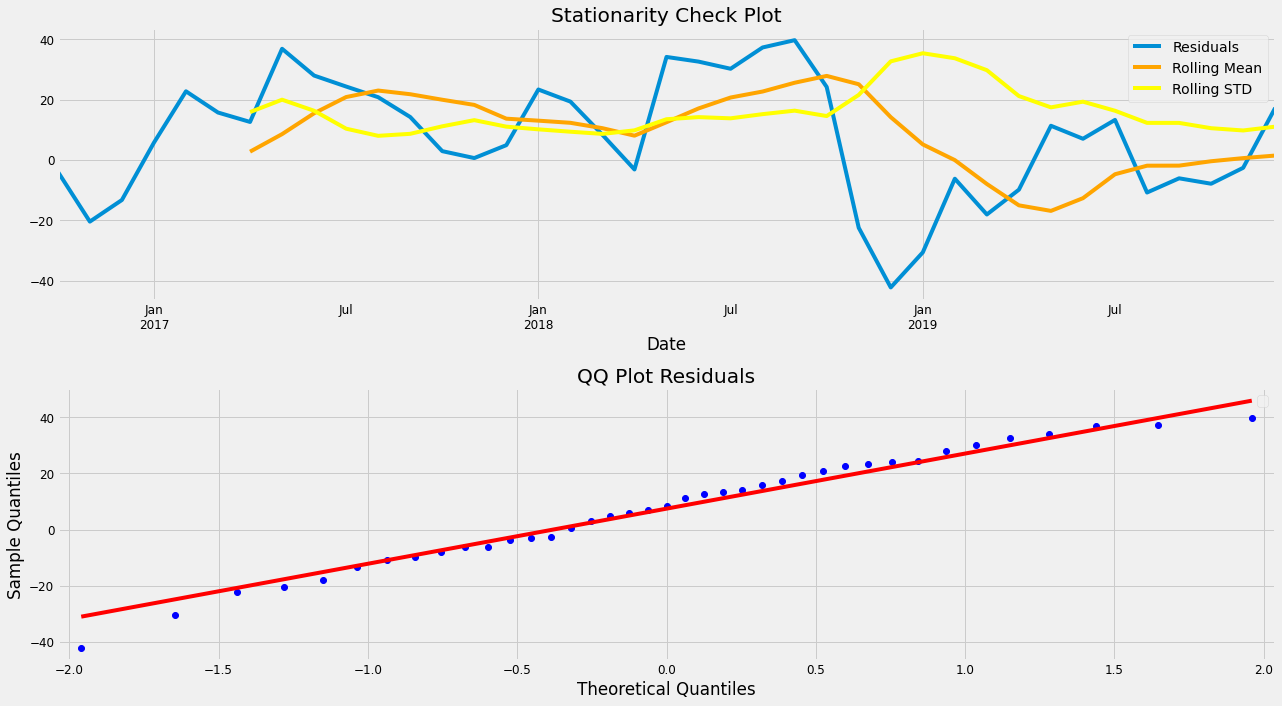

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)


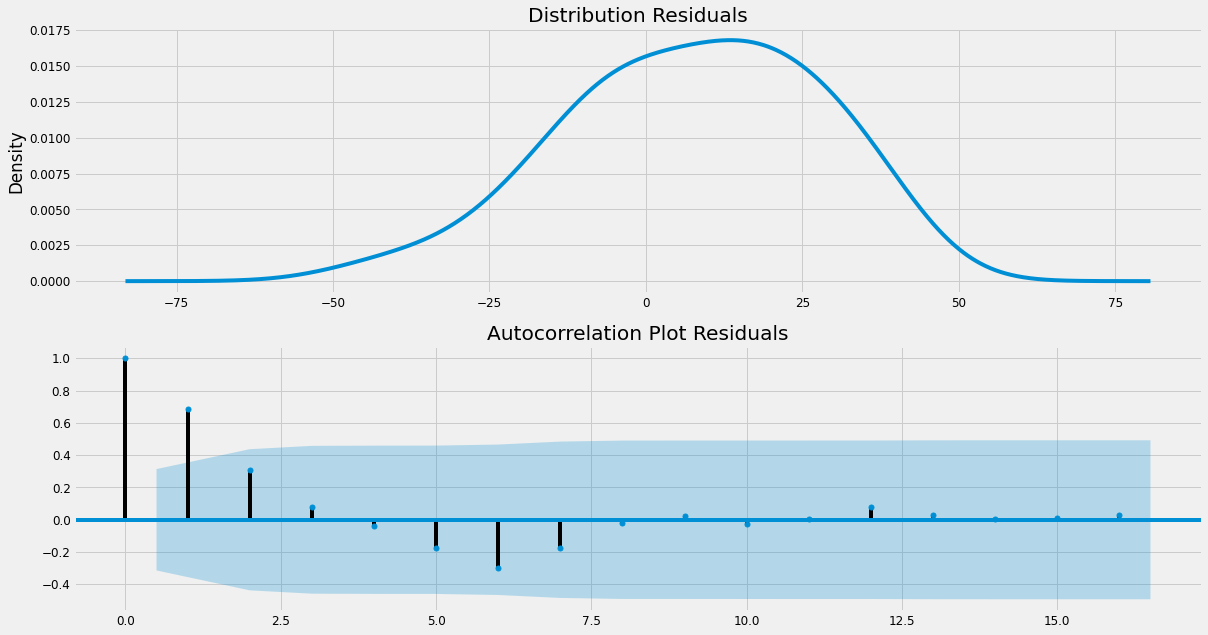

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

In [ ]:
residuals_test.describe()

count    39.000000
mean      7.434401
std      19.899868
min     -42.220201
25%      -6.142017
50%       8.339802
75%      23.041383
max      39.683684
dtype: float64

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

In [ ]:
train_list[1]

array([52.90729845, 61.42438085, 71.29244814, 74.8101506 , 69.70804455,
       70.92884829, 74.20094186, 79.59537835, 84.49984068, 78.69092705,
       70.22318162, 66.26465915, 62.00116614, 57.15554147, 55.34968775,
       52.58421514, 56.195146  , 53.66024345, 54.116633  , 61.4545905 ])

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

,0
0,0.000000
1,52.907298
2,61.424381
3,71.292448
4,74.810151
5,69.708045
6,70.928848
7,74.200942
8,79.595378
9,84.499841


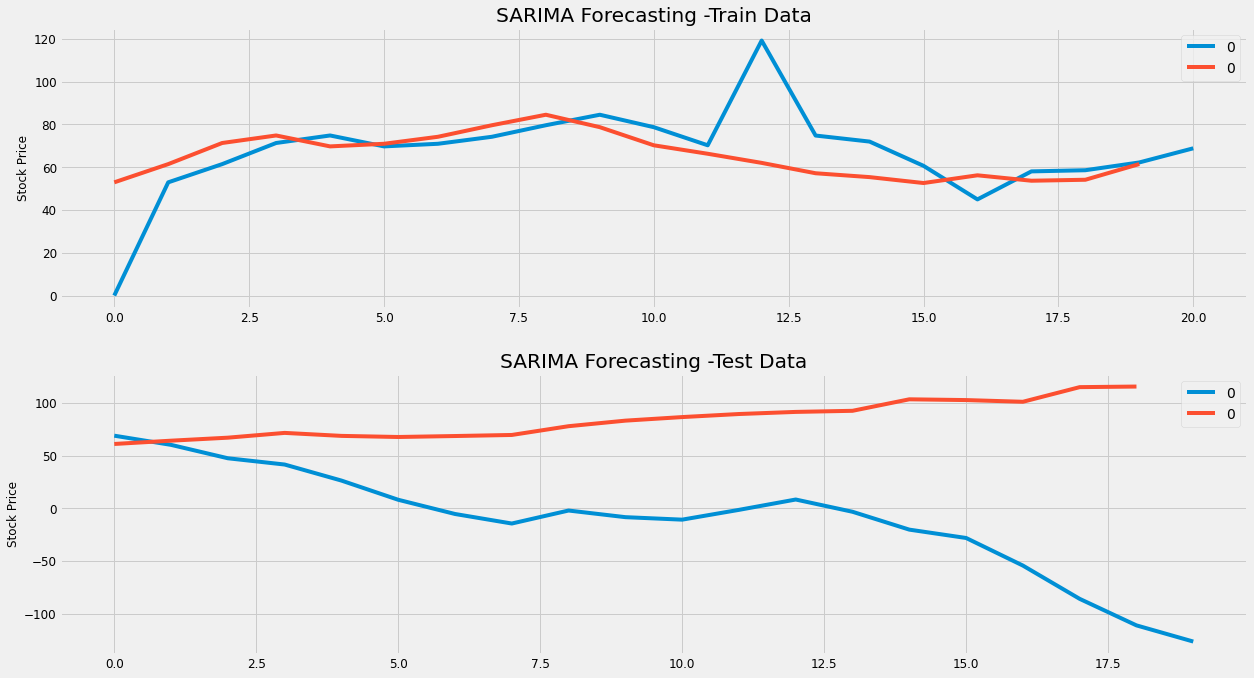

In [ ]:
## Backtest Set-1
backtest_model(train_list[1],test_list[1])

,0
0,0.000000
1,52.907825
2,61.424923
3,71.293026
4,74.810667
5,69.708389
6,70.929159
7,74.201265
8,79.595753
9,84.500262


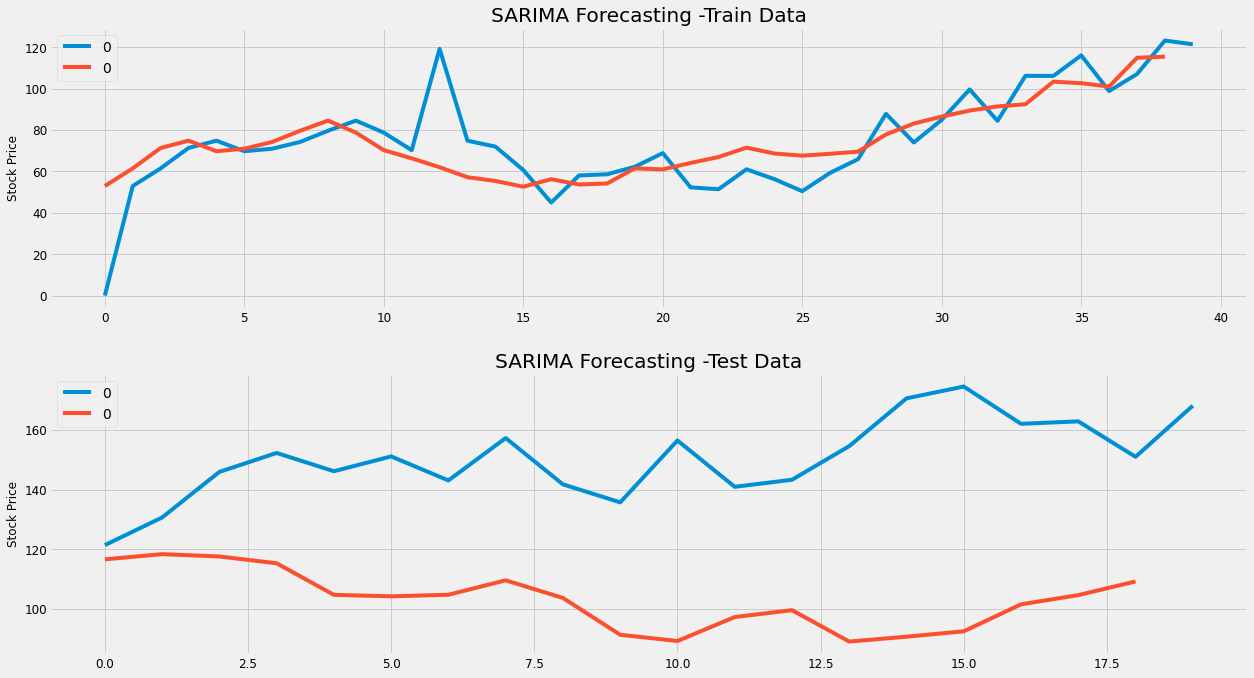

In [ ]:
backtest_model(train_list[2],test_list[2])

,0
0,0.000000
1,52.908078
2,61.425135
3,71.293207
4,74.810764
5,69.708351
6,70.929056
7,74.201106
8,79.595535
9,84.499949


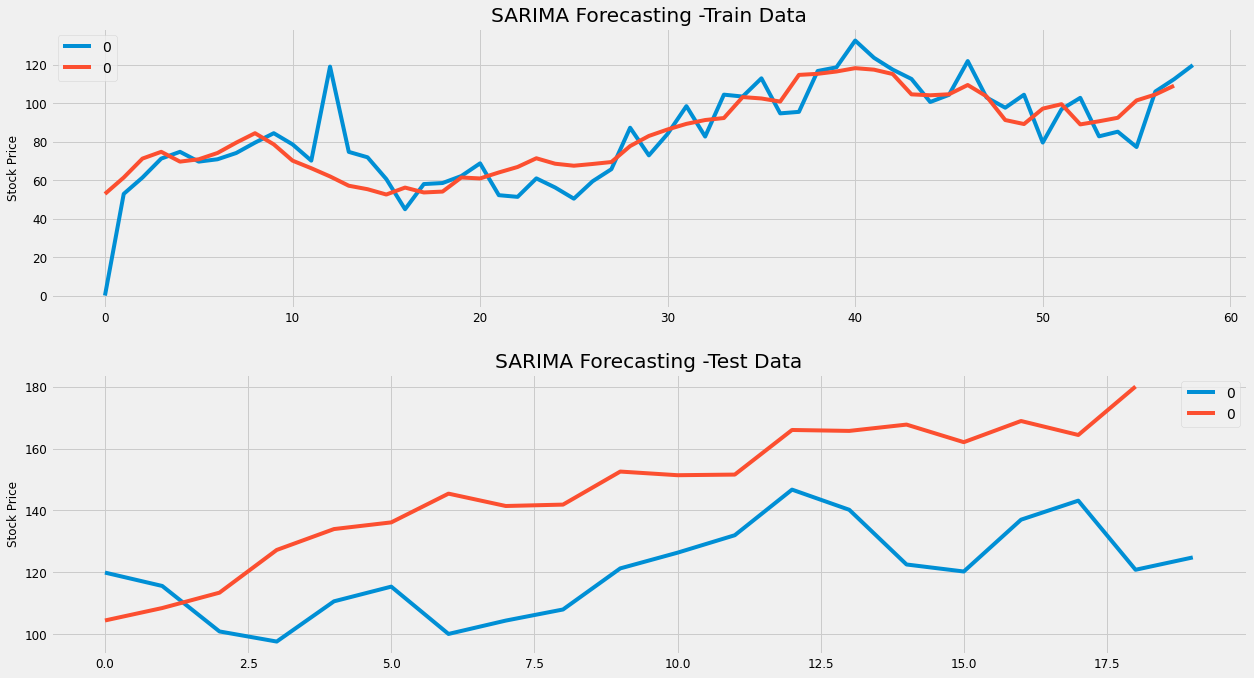

In [ ]:
backtest_model(train_list[3],test_list[3])

In [ ]:
forecasts_train

,0
0,68.811285


In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

**Seasonal ARIMA-Verdict**

The mean value is close to zero but it suggests that there is some bias in the model.
Overall the model has performed good for a problem like Stock Price Prediction being a difficult problem .



# **Facebook's Prophet Model for Time Series**

In [ ]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

,Adj Close,Year,Month,dayofweek,quarter,Date
Date,,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1,2012-01-31
2012-02-29,61.424381,2012,February,Wednesday,1,2012-02-29
2012-03-31,71.292448,2012,March,Saturday,1,2012-03-31
2012-04-30,74.810151,2012,April,Monday,2,2012-04-30
2012-05-31,69.708045,2012,May,Thursday,2,2012-05-31
...,...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3,2019-08-31
2019-09-30,215.853332,2019,September,Monday,3,2019-09-30
2019-10-31,232.974974,2019,October,Thursday,4,2019-10-31


In [ ]:
prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

In [ ]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

In [ ]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

In [ ]:
prophet_data

,ds,y
Date,,
2012-01-31,2012-01-31,52.907298
2012-02-29,2012-02-29,61.424381
2012-03-31,2012-03-31,71.292448
2012-04-30,2012-04-30,74.810151
2012-05-31,2012-05-31,69.708045
...,...,...
2019-08-31,2019-08-31,202.738817
2019-09-30,2019-09-30,215.853332
2019-10-31,2019-10-31,232.974974


In [ ]:
##Spliting Train Test
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 57
Testing Data Size : 39


In [ ]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

In [ ]:
future

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31
...,...
91,2019-08-31
92,2019-09-30
93,2019-10-31
94,2019-11-30


Forecasting Prophet-Basic Model

In [ ]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast.index = prophet_data['y'].index


In [ ]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

,Predicted,Actual
Date,,
2012-01-31,51.013627,52.907298
2012-02-29,54.127696,61.424381
2012-03-31,62.093561,71.292448
2012-04-30,64.484456,74.810151
2012-05-31,59.239299,69.708045
...,...,...
2019-08-31,137.032166,202.738817
2019-09-30,138.633809,215.853332
2019-10-31,141.063501,232.974974


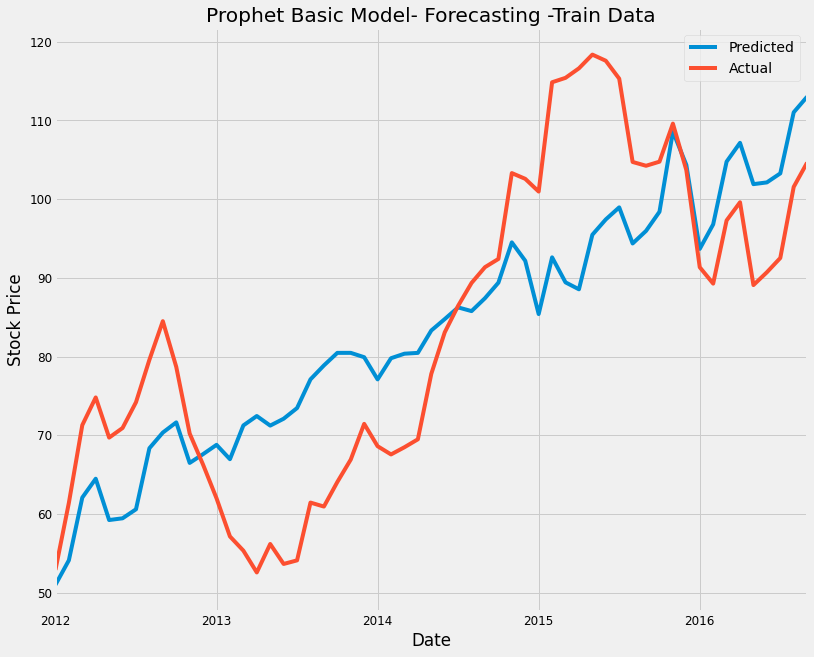

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

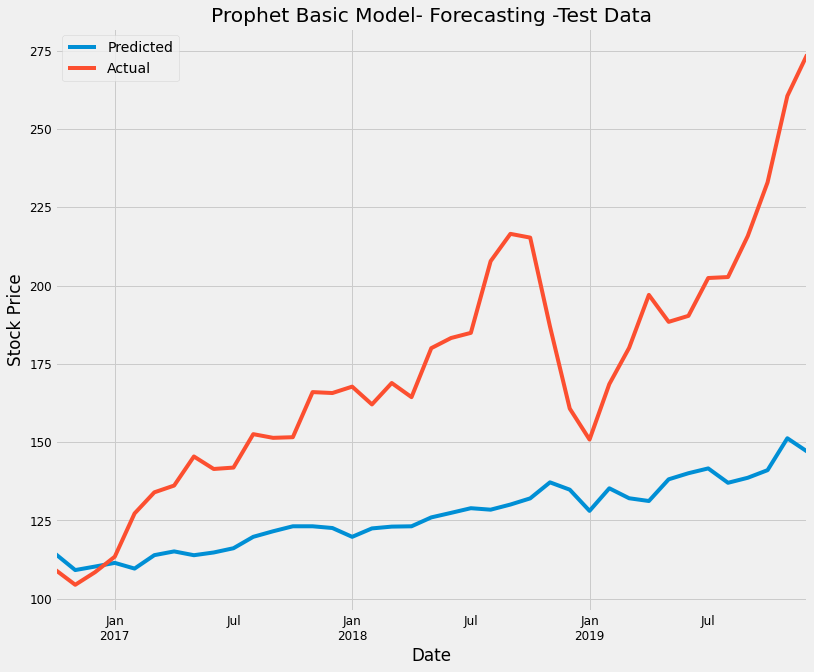

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
print(result_metrics(prophet_df['Actual'][:57],prophet_df['Predicted'][:57],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  0.598
Mean Squared Error :  157.648
Mean Absolute Error :  10.794
Mean Absolute Percentage Error 13.785
Accuracy(100-MAPE) of Model is 86.0%
None


In [ ]:
print(result_metrics(prophet_df['Actual'][57:],prophet_df['Predicted'][57:],'Prophet Basic-Test Data'))

Result Metrics for Prophet Basic-Test Data
R2 Score :  -0.973
Mean Squared Error :  2936.426
Mean Absolute Error :  46.175
Mean Absolute Percentage Error 24.535
Accuracy(100-MAPE) of Model is 75.0%
None


The Basic Prophet Model with default parameters overfits into the model as represented by the Train Test Accuracy differences.

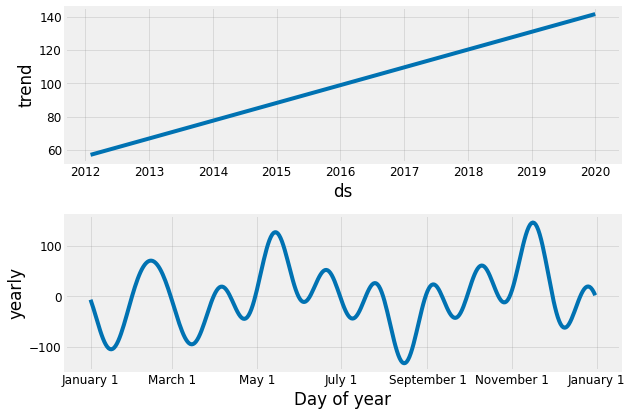

In [ ]:
fig = prophet_model.plot_components(forecast)

In [ ]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2016-10-31 2016-10-31  109.212791
Tail                    ds           y
Date                             
2019-12-31 2019-12-31  273.780718


Seasonal-ARIMA seems to have captured the model in a better way.


**Hyper-Tuning for Prophet Model**

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [ ]:
df = prophet_data

In [ ]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

In [ ]:
prophet_test_hyper.head(5)

,ds,y
Date,,
2017-08-31,2017-08-31,152.563906
2017-09-30,2017-09-30,151.386422
2017-10-31,2017-10-31,151.586949
2017-11-30,2017-11-30,165.996497
2017-12-31,2017-12-31,165.699087


In [ ]:
len(prophet_test_hyper)

29

In [ ]:
strt='2017-08-31'
end='2019-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)

    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )

    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>=strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.859205296067646
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.319035627345643
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.949163539500603
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.612467608177305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changep

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

,MAPE,Parameters
0,12.319036,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
1,12.319036,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
2,12.592062,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."


In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

Problem with Prophet is its Overfits quite easily for out dataset.
Therefore we try some other hyperparamters with Hit and Trial

In [ ]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,

                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2017-07-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.fit(prophet_train_hyper)

In [ ]:
future_hyper= prophet_tuned_model.make_future_dataframe(periods=29,freq='M')

In [ ]:
future_hyper=prophet_tuned_model.predict(future_hyper)

In [ ]:
future_hyper.index = prophet_data['y'].index

In [ ]:
prophet_hyper_df = pd.concat([future_hyper['yhat'],prophet_data['y']],axis=1,ignore_index=True)

In [ ]:
prophet_hyper_df.columns = ['Predicted','Actual']
prophet_hyper_df.tail(3)

,Predicted,Actual
Date,,
2019-10-31,162.409937,232.974974
2019-11-30,163.999990,260.569057
2019-12-31,165.712779,273.780718


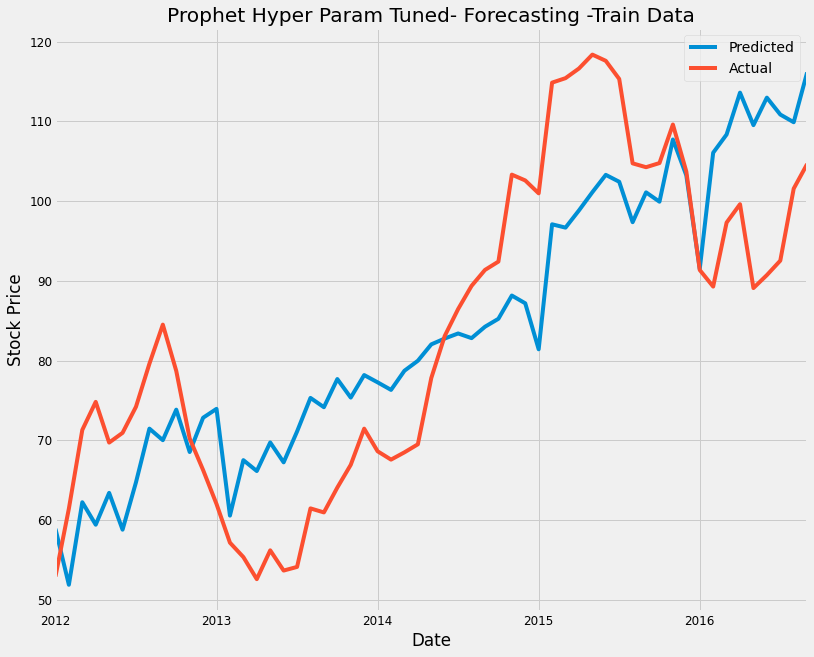

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

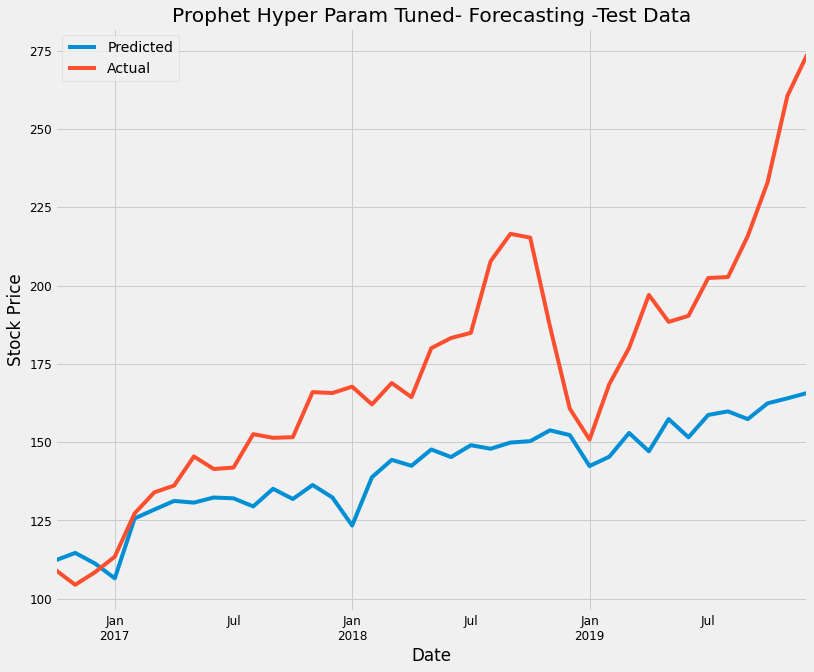

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][57:].plot(label='Predicted')
prophet_hyper_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.784
Mean Squared Error :  129.543
Mean Absolute Error :  9.986
Mean Absolute Percentage Error 12.076
Accuracy(100-MAPE) of Model is 88.0%


In [ ]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -1.31
Mean Squared Error :  2187.789
Mean Absolute Error :  40.501
Mean Absolute Percentage Error 20.338
Accuracy(100-MAPE) of Model is 80.0%


After Hyper-parameter tuning the model is not able to capture the seasonality and sudden jump in time series in the Year 2017 onwards.

->Prophet is easily overfitted.

->Seasonal ARIMA is superior to Prophet

->Prophet is good at capturing the trend.

->By creating Extra Regressors we can maybe improve the Results in future projects.




**Project Summary**

Seasonal ARIMA Vs Facebook's Prophet

->Advantages of Prophet includes very easy to implement, fast , and less statistical know-how model . In Seasonal ARIMA we had to follow lot of tests and process to generate predictions.

->Seasonal ARIMA is better at capturing the seasonality part .

->Prophet has a overfitting problem .

->Overall Both models are robust .

->Prophet is better at dealing with outliers.

->We have found Seasonal ARIMA is much better our at prediction problem.
More confidence when predicting with Seasonal-ARIMA since its backed by Mathematical and Statistical tests.

->Accuracy of SARIMA is 89% and 80% for Prophet(Both on Out of Sample Data)




# Actionable Insight
Observing the Trend given by Both Models.

**AAPL IS A BUY.**